|STUDENT NAME|STUDENT EMAIL|
|---|---|
|Daila Alexandre|r20191182@novaims.unl.pt|
|Diogo Silva|20221393@novaims.unl.pt|
|Luís Fernandes|20221649@novaims.unl.pt|

<h1 style="background-color: #FF5A60; color: white; font-size: 34px; font-weight: bold; padding: 10px;">Table of Contents</h1>

* [0. Instalations and Imports](#install)
* [1. Data Exploration](#explore)
    * [1.1: Load the data](#load)
    * [1.2: Preliminary Data Analisys](#analisys)
        * [1.2.1: Train Basic Information](#traininfo)
        * [1.2.2: Train_reviews Basic Information](#trainrinfo)
        * [1.2.3: Missing Values](#miss)
        * [1.2.4: Duplicates](#duplicates)
        * [1.2.5: Examples of text variables (description, host_about, comment)](#examples)
    * [1.3: Exploration of the Dependent Variable](#explore_dependent)
    * [1.4: Exploration of text variables](#explore_text)
        * [1.4.1: Simple Cleaning](#simplec)
        * [1.4.2: Language Identification](#language_id)
        * [1.4.3: Language Analysis](#language)
        * [1.4.4: Word Clouds](#wordclouds)
        * [1.4.5: Word Count](#wordcount)
        * [1.4.6: Character Counts](#charac_counts)
        * [1.4.7: Natural Language Processing Analysis](#nlp)
* [2. Steps to Preprocessing](#preprocess)
    * [2.1: Functions for Preprocessing](#func)
        * [2.1.1: Monetary Value](#money)
        * [2.1.2: Datetime Values](#datetime)
        * [2.1.3: Emojis](#emotions)
        * [2.1.4: Entity Values](#entity)
        * [2.1.5: Empty Values](#empties)
    * [2.2: Final Treatment/Cleaning Function](#finalclean)
        * [2.2.1: Complete text cleaning](#cleanen)
        * [2.2.2: Basic Cleaning](#cleanbasic)
    * [2.3: Cleaning the dataset](#datacleanc)
* [3. Exploration After Cleaning](#explore2)
    * [3.1: Dataset After Cleaning](#examples_clean)
    * [3.2: Most Common Words](#common)
    * [3.3: N-grams](#ngram)
    * [3.4: LDA - Topic Modelling](#lda)

<h1 id="install" style="background-color: #FF5A60; color: white; font-size: 34px; font-weight: bold; padding: 10px;">0. Instalations and Imports</h1>

In [ ]:
# Installs
!pip install nltk
!pip install wordcloud
!pip install matplotlib
!pip install nltk
!pip install beautifulsoup4
!pip install html5lib
!pip install spacy
!pip install pyLDAvis
!pip install pyspellchecker
!pip install langdetect
!pip install googletrans==4.0.0-rc1
!pip install nltk
!pip install beautifulsoup4
!pip install html5lib
!pip install tqdm==4.48.2
!pip install numpy==1.22.1
!pip install gensim
!pip install pyLDAvis

# Downloads
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
!python -m spacy download en_core_web_sm
!python -m spacy download pt_core_news_sm

In [3]:
#basics
import pandas as pd
import numpy as np

#nltk
import nltk
from nltk import ngrams
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english') + stopwords.words('portuguese'))
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk import FreqDist
nltk.download('punkt')  # Download the necessary NLTK data
from nltk.tokenize import word_tokenize

#sklearn
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.cm as cm

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.offline import plot

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

#gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel, Word2Vec

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

#others
import re
import spacy
import string
from string import punctuation
from tqdm import tqdm
from bs4 import BeautifulSoup
from textblob import TextBlob
from googletrans import Translator
from spellchecker import SpellChecker
from transformers import BertTokenizer
from collections import Counter, defaultdict
from langdetect import detect, LangDetectException
import joblib
from dateutil.parser import parse
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LuisFernandes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/LuisFernandes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h1 id="explore" style="background-color: #FF5A60; color: white; font-size: 34px; font-weight: bold; padding: 10px;">1. Data Exploration</h1>

<h1 id="load" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">1.1 Load the data</h1>


In [4]:
train = pd.read_excel('/Users/LuisFernandes/Desktop/TM Project/TM_03_06/Originals/train.xlsx')
train_reviews = pd.read_excel('/Users/LuisFernandes/Desktop/TM Project/TM_03_06/Originals/train_reviews.xlsx')

In [12]:
train.head(5)

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [13]:
train_reviews.head(5)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


<h1 id="analisys" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">1.2 Preliminary Data Analysis</h1>

In [14]:
class DataExplorer:
    def __init__(self, df):
        self.df = df

    def explore_data(self):
        try:
            print("=" * 50)
            print("                Exploring Data                ")
            print("=" * 50)
            print("Data shape: ", self.df.shape)
            print("-" * 50)
            print("Data columns: ")
            print(self.df.columns)
            print("-" * 50)
            print("Data info: ")
            print(self.df.info())
            print("-" * 50)
            print("Data describe: ")
            print(self.df.describe())
            print("-" * 50)
            print("Number of missing values by column: ")
            print(self.df.isna().sum())
            print("-" * 50)
            print("unlisted Value Counts: ")
            print(self.df['unlisted'].value_counts())
            print("-" * 50)
            print("Duplicates: ")
            num_duplicates = self.df.duplicated().sum()
            print(num_duplicates)
        except:
            pass

In [15]:
# apply to dataset called 'train' and 'train_reviews'
explorer_train = DataExplorer(train)
explorer_train_reviews = DataExplorer(train_reviews)

<h3 id="traininfo" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.2.1 Train - Basic Information</h3>

In [16]:
explorer_train.explore_data()

                Exploring Data                
Data shape:  (12496, 4)
--------------------------------------------------
Data columns: 
Index(['index', 'description', 'host_about', 'unlisted'], dtype='object')
--------------------------------------------------
Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12496 entries, 0 to 12495
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        12496 non-null  int64 
 1   description  12496 non-null  object
 2   host_about   12496 non-null  object
 3   unlisted     12496 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 390.6+ KB
None
--------------------------------------------------
Data describe: 
              index      unlisted
count  12496.000000  12496.000000
mean    6248.500000      0.277129
std     3607.428817      0.447598
min        1.000000      0.000000
25%     3124.750000      0.000000
50%     6248.500000      0.000000
75%     93

**Data Shape:** The dataset contains 12,496 rows and 4 columns. Each row represents a data entry.

**Data Columns:** The dataset has four columns named 'index', 'description', 'host_about', and 'unlisted'.

**Data Types:** The 'description', and 'host_about' columns are of object type, while the 'unlisted' and 'index' column is of integer type.

**Missing Values:** There are no missing values in any of the columns.

**Unlisted Distribution:** The 'unlisted' column has two unique values, 0 and 1, indicating whether a listing is unlisted or not. The value counts show that there are 9,033 unlisted listings and 3,463 listed listings.

**Duplicates:** There are no duplicates in the dataset.


<h3 id="trainrinfo" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.2.2 Train_reviews - Basic Information</h3>

In [18]:
explorer_train_reviews.explore_data()

                Exploring Data                
Data shape:  (721402, 2)
--------------------------------------------------
Data columns: 
Index(['index', 'comments'], dtype='object')
--------------------------------------------------
Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721402 entries, 0 to 721401
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     721402 non-null  int64 
 1   comments  721402 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.0+ MB
None
--------------------------------------------------
Data describe: 
               index
count  721402.000000
mean     6212.577535
std      3604.810218
min         1.000000
25%      3058.000000
50%      6242.000000
75%      9265.000000
max     12494.000000
--------------------------------------------------
Number of missing values by column: 
index       0
comments    0
dtype: int64
-----------------------------------------------

**Data Shape:** The dataset contains 721,402 rows and 2 columns. Each row represents a data entry.

**Data Columns:** The dataset has two columns named 'index' and 'comments'.

**Data Types:** The 'index' column is of integer type, and the 'comments' column is of object type.

**Missing Values:** There are no missing values in any of the columns.

**Unlisted Distribution:** The 'unlisted' column doesn't exist in this train_reviews dataset.

**Duplicates:** There are no duplicates in the dataset.

<h3 id="miss" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.2.3 Missing Values</h3>

Even though there is no missing values on both dataframes, there is some empty values with only spaces in the host_about

In [20]:
train[train['host_about']==' ']

,index,description,host_about,unlisted
4689,4690,Apartamento com excelente vista sobre o rio Te...,,0
4856,4857,"Apartamento totalmente novo, muito central, eq...",,0
5238,5239,"Apartamento muito central, entre Principe Real...",,0
5501,5502,ⓕ InnLoco Lisbon GuestHouse ⓕ<br /><br />2 min...,,0
5985,5986,ⓕ InnLoco Lisbon GuestHouse ⓕ<br /><br />2 min...,,0
6322,6323,ⓕ InnLoco Lisbon GuestHouse ⓕ<br /><br />If yo...,,0
6504,6505,Perfect perfect location!<br /><br />2 minutes...,,1
7117,7118,"Apartamento totalmente novo, muito central, eq...",,0
7489,7490,InnLoco Lisboa - Guest House<br /><br />------...,,0
7734,7735,ⓕ InnLoco Lisbon GuestHouse ⓕ<br /><br />2 min...,,0


For future treatment, this 'empty' values in the host_about are gonna turn into NaN

In [5]:
train.replace(' ', np.nan, inplace=True)

In [22]:
train[train['host_about'].isna()]

,index,description,host_about,unlisted
4689,4690,Apartamento com excelente vista sobre o rio Te...,NaN,0
4856,4857,"Apartamento totalmente novo, muito central, eq...",NaN,0
5238,5239,"Apartamento muito central, entre Principe Real...",NaN,0
5501,5502,ⓕ InnLoco Lisbon GuestHouse ⓕ<br /><br />2 min...,NaN,0
5985,5986,ⓕ InnLoco Lisbon GuestHouse ⓕ<br /><br />2 min...,NaN,0
6322,6323,ⓕ InnLoco Lisbon GuestHouse ⓕ<br /><br />If yo...,NaN,0
6504,6505,Perfect perfect location!<br /><br />2 minutes...,NaN,1
7117,7118,"Apartamento totalmente novo, muito central, eq...",NaN,0
7489,7490,InnLoco Lisboa - Guest House<br /><br />------...,NaN,0
7734,7735,ⓕ InnLoco Lisbon GuestHouse ⓕ<br /><br />2 min...,NaN,0


This NaN are not gonna be removed as they can provide some valuable information in the future. But they will be taken into consideration

<h3 id="duplicates" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.2.4 Duplicates</h3>

### Duplicates in Description and Host About (train)

In [24]:
duplicates = train.duplicated(subset=['description', 'host_about'], keep=False)
duplicate_rows = train[duplicates].sort_values(by=['description', 'host_about'])
duplicate_rows

,index,description,host_about,unlisted
4487,4488,"""Are you really ready to feel like a local?"" S...",Eternal in love for lisbon_x000D_\nMy pleasure...,0
8450,8451,"""Are you really ready to feel like a local?"" S...",Eternal in love for lisbon_x000D_\nMy pleasure...,0
10978,10979,"""Are you really ready to feel like a local?"" S...",Eternal in love for lisbon_x000D_\nMy pleasure...,0
1935,1936,#FRIENDS WHO HAVEN'T MET YET! <br /><br />We t...,hi everyone\nJust a 22 year old making new fri...,0
1967,1968,#FRIENDS WHO HAVEN'T MET YET! <br /><br />We t...,hi everyone\nJust a 22 year old making new fri...,0
...,...,...,...,...
6499,6500,入住独一无二的房源，感受市中心的律动。<br /><br /><b>License numb...,"Welcome to LX History Hotel in Lisbon, Portuga...",1
11652,11653,入住这处在这处适合家庭入住的房源与亲朋好友重聚。Hello.Our apartment is...,大家好！我是苏珊娜，很高兴和您分享我的房源，广交世界各地的朋友。\n\n,1
11803,11804,入住这处在这处适合家庭入住的房源与亲朋好友重聚。Hello.Our apartment is...,大家好！我是苏珊娜，很高兴和您分享我的房源，广交世界各地的朋友。\n\n,1
1666,1667,￫ Charming apartment perfectly located walking...,"I am an interior designer, plant lover, and wo...",1


Eventhough with different index, there is a lot of duplicate properties in both columns mentioned.

Therefore it is important to check the reviews for the same propertie but with different index

In [25]:
print('DUPLICATE 1 \n\n',train_reviews[train_reviews['index']==4488])
print('DUPLICATE 2 \n\n',train_reviews[train_reviews['index']==8451])
print('DUPLICATE 3 \n\n',train_reviews[train_reviews['index']==10979])

DUPLICATE 1 

         index                                           comments
262714   4488  Amazing place and country! Perfect size and Au...
262715   4488  Augusto is a great guy, he is very friendly an...
262716   4488  Augusto's apartment was a great location for u...
262717   4488  Uitstekende plek, heel centraal en dus dicht b...
262718   4488  Augusto was a great host!  He took our request...
...       ...                                                ...
262845   4488  Simple and nice flat in a very central area. Y...
262846   4488                                        Great stay!
262847   4488  I stayed at Paulo's for 8 days. <br/><br/>As a...
262848   4488  very sweet area, romantic location but yet it ...
262849   4488                                  Perfect location!

[136 rows x 2 columns]
DUPLICATE 2 

         index                                           comments
492355   8451  Apartamento super novo e aconchegante. Recepçã...
492356   8451  We spent an amazing w

From this example we can see that the reviews are different (the number of reviews is also different), and we can assume that it might mean different rooms of one propertie, for example.

### Duplicates in Reviews

In [26]:
duplicates_reviews=train_reviews.duplicated(keep=False)
duplicate_rows_reviews = train_reviews[duplicates_reviews]
duplicate_rows_reviews

,index,comments
3248,61,Excelente!
3254,61,Excelente!
4225,70,Everything was great!
4263,70,Everything was great!
6584,144,"Sofia is an incredible host, and made us feel ..."
...,...,...
720042,12464,Boa localização.
721175,12493,Great location!
721188,12493,Great location!
721195,12494,.


Although these are duplicates, it can be from different clients. Reviews like "Excellent" are very common, so it won't be removed cause can make difference in the future model.

In [27]:
duplicates = train_reviews.duplicated(subset=['comments'], keep=False)
duplicate_rows = train_reviews[duplicates].sort_values(by=['comments'])
duplicate_rows

,index,comments
444062,7669,!
19315,354,!
396981,6819,!
638041,11055,!
672760,11670,!
...,...,...
19288,354,🙂
249564,4293,🙂
311454,5417,🙂
309588,5394,🙏


This kind of examples, like emojis, and single charachters are going to be treated in the text cleaning.

<h3 id="examples" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.2.5 Examples of text variables (description, host_about, comment)</h3>

In [28]:
print('DESCRIPTION:\n'+train['description'][5]+'\n\nHOST ABOUT:\n'+train['host_about'][5]+'\n\nCOMMENT:\n'+train_reviews['comments'][7])

DESCRIPTION:
IMPORTANT: In response to COVID-19, this property has extended cleaning & disinfection measures & protocols to guarantee the safety of our guests.<br />The apartment in Lisbon has 2 bedrooms and has capacity for 4 people.<br /><br /><b>The space</b><br />IMPORTANT: In response to COVID-19, this property has extended cleaning & disinfection measures & protocols to guarantee the safety of our guests.<br />The apartment in Lisbon has 2 bedrooms and has capacity for 4 people. <br />The apartment is 70 m². <br />The house is situated in a residential neighborhood in the center of the city.<br />The accommodation is equipped with the following items: lift, iron, internet (Wi-Fi), hair dryer, balcony, electric heating, 1 TV, tv satellite.<br />In the  kitchen, refrigerator, microwave, oven, freezer, washing machine, dishwasher, dishes/cutlery, kitchen utensils, coffee machine and toaster are provided.<br /><br /><b>Other things to note</b><br />Included services:<br /><br />- Des

<h1 id="explore_dependent" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">1.3 Exploration of the Dependent Variable</h1>

In [24]:
def depen_var_exp(df_to_plot, title):
    counts = df_to_plot['unlisted'].value_counts()
    df = pd.DataFrame({'labels': ['Not Unlisted', 'Unlisted'], 'counts': counts})
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x="labels", y="counts", data=df, palette=["green", "red"])
    ax.set(title=title, xlabel='', ylabel='count')
    sns.despine(left=True, bottom=True)
    plt.show()

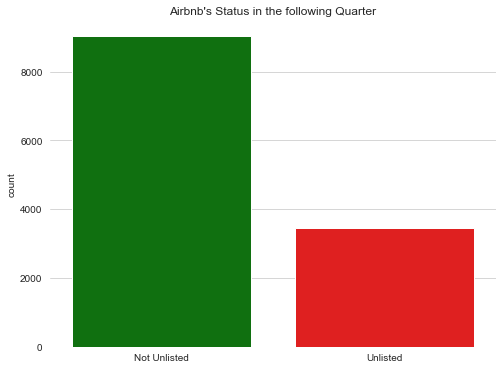

In [25]:
depen_var_exp(train, "Airbnb's Status in the following Quarter")

The dataset is unbalanced

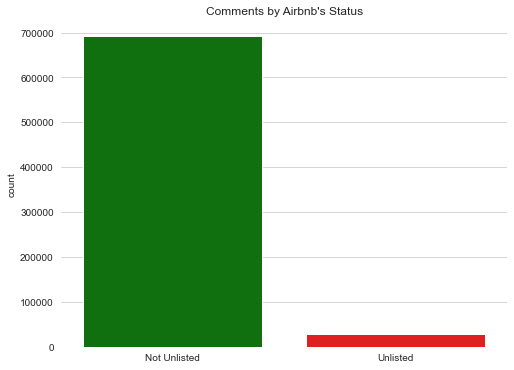

In [26]:
merged_df = train_reviews.merge(train)
depen_var_exp(merged_df, "Comments by Airbnb's Status")

<h1 id="explore_text" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">1.4 Exploration of text variables</h1>

<h3 id="simplec" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.4.1 Simple Cleaning</h3>

In order to allow a better exploration without taking important factors out from the text, it is important to define a function of simple_cleaning, only to remove the html text that will disturb the exploration. It will be the only cleaning performed before the exploration.

In [6]:
def simple_cleaning(text):
    if isinstance(text, str):
        # Remove HTML tags
        text = BeautifulSoup(text, "html.parser").get_text()
    
    return text

In [7]:
# Apply simple_cleaning function to 'description' and 'host_about' columns in train dataset
train['description'] = train['description'].apply(simple_cleaning)
train['host_about'] = train['host_about'].apply(simple_cleaning)

# Apply simple_cleaning function to 'comments_lang' column in train_reviews dataset
train_reviews['comments'] = train_reviews['comments'].apply(simple_cleaning)

<h3 id="language_id" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.4.2 Language Identification</h3>

In this section, it is going to be detected the language used in 'description', 'host_about' and 'reviews'.

In [8]:
#function using detect so it ignores empty values (such as seen in host_about)
def detect_lang(text):
    try:
        return detect(text)
    except:
        return None

# detect the language of text variables
language_desc = train['description'].apply(lambda x: detect_lang(x))
language_host = train['host_about'].apply(lambda x: detect_lang(x))
language_comm = train_reviews['comments'].apply(lambda x: detect_lang(x))

# map language initials to full names
language_names = {'ca': 'Catalan', 'da': 'Danish', 'de': 'German', 'en': 'English', 'es': 'Spanish', 'fr': 'French', 'it': 'Italian', 'nl': 'Dutch', 'no': 'Norwegian', 'pl': 'Polish', 'pt': 'Portuguese', 'ru': 'Russian', 'sv': 'Swedish', 'zh-cn': 'Chinese'}

language_desc_counts = language_desc.map(language_names).value_counts()
language_host_counts = language_host.map(language_names).value_counts()
language_comm_counts = language_comm.map(language_names).value_counts()

Add a column language for each parameter (description, host_about and comments)

In [9]:
# Add description language column to train DataFrame
train['description_lang'] = language_desc.map(language_names)

# Add host_about language column to train DataFrame
train['host_about_lang'] = language_host.map(language_names)

# Add comments language column to train_reviews DataFrame
train_reviews['comments_lang'] = language_comm.map(language_names)


In [10]:
# List of the desired order
new_column_order = ['index', 'description', 'description_lang', 'host_about', 'host_about_lang', 'unlisted']

# Reorder the columns in the DataFrame
train = train[new_column_order]

In [11]:
train.head()

,index,description,description_lang,host_about,host_about_lang,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",English,Alojamento Local Registro: 20835/AL,Portuguese,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...",Portuguese,"I am friendly host, and I will try to always b...",English,1
2,3,Trafaria’s House is a cozy and familiar villa ...,English,"I am a social person liking to communicate, re...",English,1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Portuguese,Hello!_x000D_\nI m Portuguese and i love to me...,English,0
4,5,Joli appartement en bordure de mer. 2 min. a ...,French,Nous sommes une famille avec deux enfants de 1...,French,0


Language detector was not able to detect 51 languages of the descriptions:

In [14]:
train['description_lang'].isna().sum()


51

Language detector was not able to detect 256 languages of the host_about, apparently for mistakes in the text and wrong entries:

In [15]:
train['host_about_lang'].isna().sum()


256

Language detector was not able to detect 11260 languages of the comments, apparently for mistakes in the text and wrong entries:

In [16]:
train_reviews['comments_lang'].isna().sum()


11260

Eventhough language detector was not able to identify some entries language, it only represents a small amount, and the new variable describing the language is only going to be used as a filter, so no cells will be removed for now.

For future use purpose, as the language detector tool takes a lot of time to run, lets save the datasets to a csv file with the language columns: train_lang and train_reviews_lang

In [19]:
# Specify the file path and name
file_path_train_reviews = '/Users/LuisFernandes/Desktop/TM Project/TM_03_06/Originals_w_language/train_reviews_lang.csv'
file_path_train = '/Users/LuisFernandes/Desktop/TM Project/TM_03_06/Originals_w_language/train_lang.csv'
# Convert DataFrame to CSV and save it
train_reviews.to_csv(file_path_train_reviews, index=False)
train.to_csv(file_path_train, index=False)

In [81]:
train_lang = pd.read_csv('/Users/LuisFernandes/Desktop/TM Project/TM_03_06/Originals_w_language/train_lang.csv')
train_reviews_lang = pd.read_csv('/Users/LuisFernandes/Desktop/TM Project/TM_03_06/Originals_w_language/train_reviews_lang.csv')

<h3 id="language" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.4.3 Language Analysis</h3>

In [20]:
# convert series to dataframe
language_desc_counts = language_desc_counts.reset_index()
language_host_counts = language_host_counts.reset_index()
language_comm_counts = language_comm_counts.reset_index()

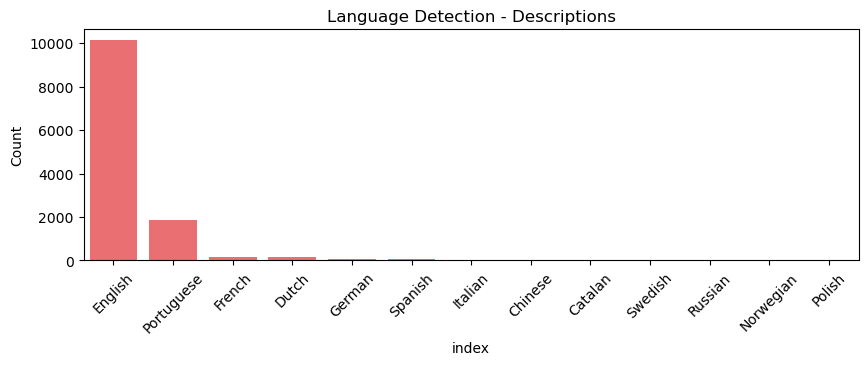

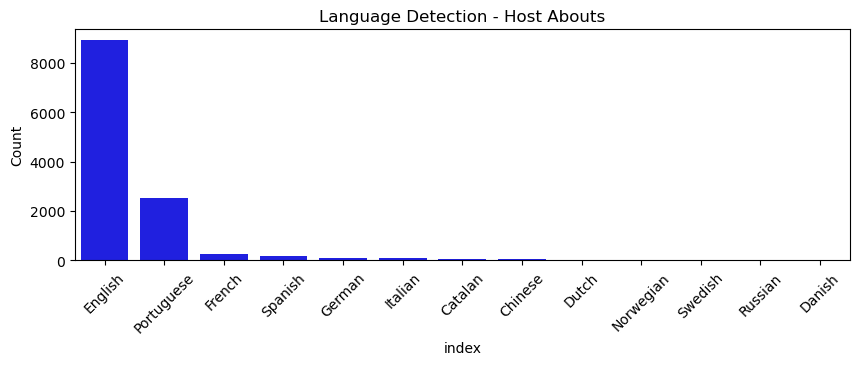

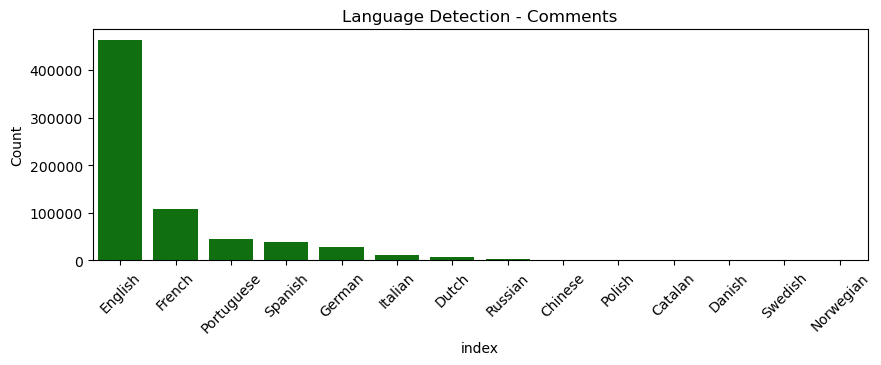

In [21]:
# create the bar plot for desc
fig_desc, ax_desc = plt.subplots(figsize=(10, 3))
sns.barplot(data=language_desc_counts, x='index', y='description', color='#FF5A60')
ax_desc.set_xticklabels(ax_desc.get_xticklabels(), rotation=45)
ax_desc.set(title='Language Detection - Descriptions', ylabel='Count')

# create the bar plot for host
fig_host, ax_host = plt.subplots(figsize=(10, 3))
sns.barplot(data=language_host_counts, x='index', y='host_about', color='blue')
ax_host.set_xticklabels(ax_host.get_xticklabels(), rotation=45)
ax_host.set(title='Language Detection - Host Abouts', ylabel='Count')

# create the bar plot for comments
fig_comm, ax_comm = plt.subplots(figsize=(10, 3))
sns.barplot(data=language_comm_counts, x='index', y='comments', color='green')
ax_comm.set_xticklabels(ax_comm.get_xticklabels(), rotation=45)
ax_comm.set(title='Language Detection - Comments', ylabel='Count')

plt.show()

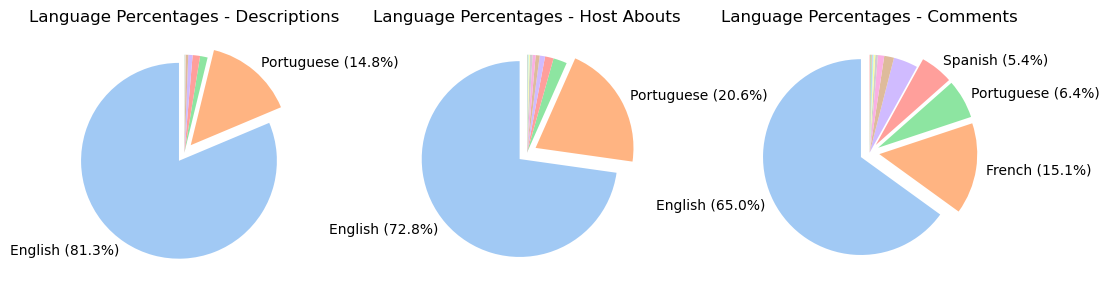

In [22]:
# calculate language counts as percentages
language_desc_perc = language_desc_counts['description'] / language_desc_counts['description'].sum() * 100
language_host_perc = language_host_counts['host_about'] / language_host_counts['host_about'].sum() * 100
language_comm_perc = language_comm_counts['comments'] / language_comm_counts['comments'].sum() * 100

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Create the pie chart for descriptions
desc_labels = []
desc_explode = []
for label, perc in zip(language_desc_counts['index'], language_desc_perc):
    if perc >= 5:
        desc_labels.append(f'{label} ({perc:.1f}%)')
        desc_explode.append(0.1)
    else:
        desc_labels.append('')
        desc_explode.append(0)

axes[0].pie(language_desc_perc, labels=desc_labels, explode=desc_explode, colors=sns.color_palette('pastel', len(language_desc_counts)),
             startangle=90)
axes[0].set(title='Language Percentages - Descriptions')

# Create the pie chart for host_abouts
host_labels = []
host_explode = []
for label, perc in zip(language_host_counts['index'], language_host_perc):
    if perc >= 5:
        host_labels.append(f'{label} ({perc:.1f}%)')
        host_explode.append(0.1)
    else:
        host_labels.append('')
        host_explode.append(0)

axes[1].pie(language_host_perc, labels=host_labels, explode=host_explode, colors=sns.color_palette('pastel', len(language_host_counts)),
             startangle=90)
axes[1].set(title='Language Percentages - Host Abouts')

# Create the pie chart for comments
comm_labels = []
comm_explode = []
for label, perc in zip(language_comm_counts['index'], language_comm_perc):
    if perc >= 5:
        comm_labels.append(f'{label} ({perc:.1f}%)')
        comm_explode.append(0.1)
    else:
        comm_labels.append('')
        comm_explode.append(0)

axes[2].pie(language_comm_perc, labels=comm_labels, explode=comm_explode, colors=sns.color_palette('pastel', len(language_comm_counts)),
             startangle=90)
axes[2].set(title='Language Percentages - Comments')

plt.subplots_adjust(wspace=0.4)

plt.show()

English is the dominant language in all variables. Portuguese also has a significance in Descriptions and Host_About but not so much in the Comments where French takes the second place.

<h3 id="wordclouds" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.4.4 Word Clouds</h3>

In [23]:
def word_cloud(df_column):
    stopwords = set(STOPWORDS)
    extra_stopwords = {'https', 't', 'co'}
    stopwords.update(extra_stopwords)
    
    # Convert elements to strings and create a single string of all the texts by joining them together
    comments = ' '.join(map(str, df_column.tolist()))
    
    # Create a wordcloud object with a black background and scale of 3
    wordcloud = WordCloud(background_color='black', 
                          scale=3,
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=50).generate(comments)

    fig = plt.figure(figsize=(15, 15))
    
    # Generate the wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()


/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-

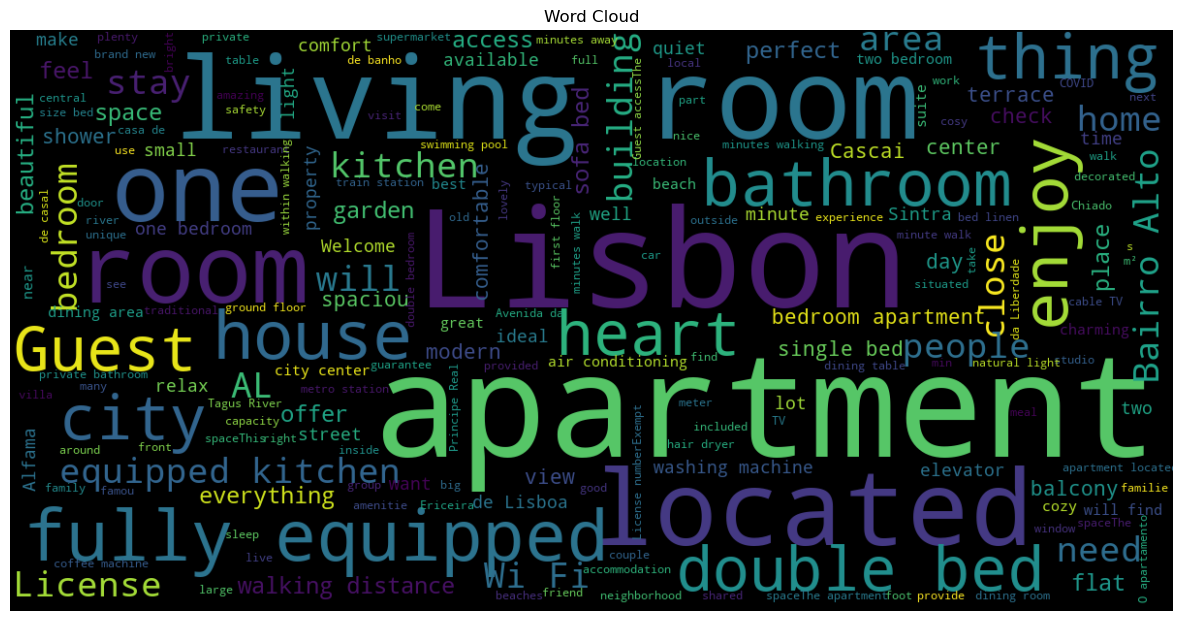

In [24]:
word_cloud(train['description'])

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-pa

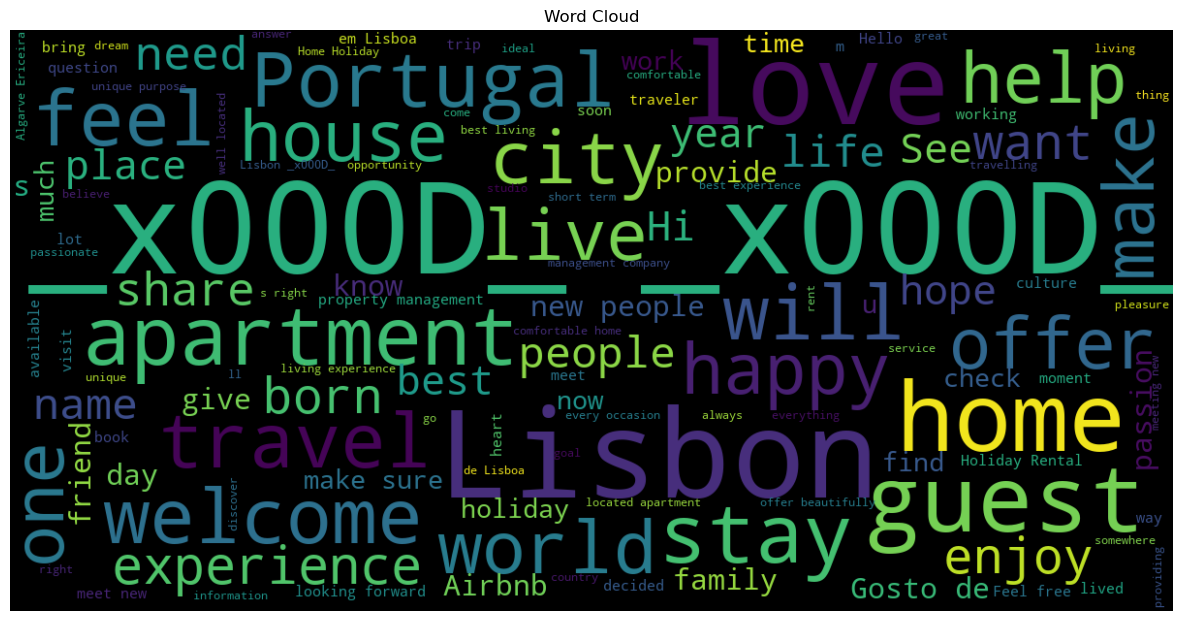

In [25]:
word_cloud(train['host_about'])

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-pa

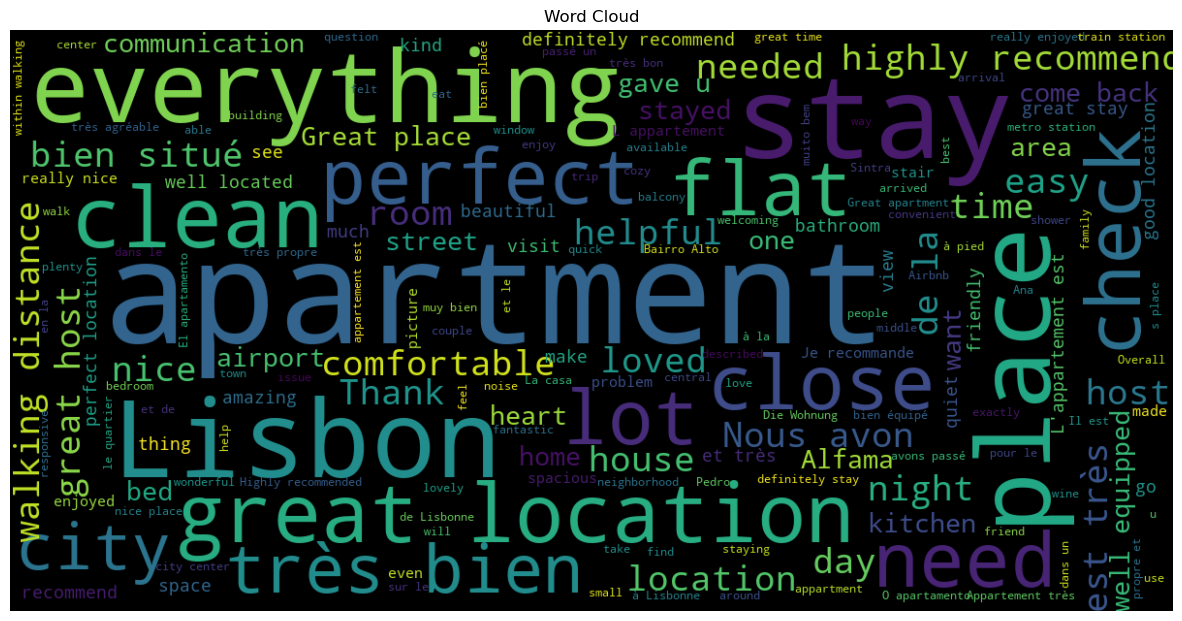

In [26]:
word_cloud(train_reviews['comments'])

<h3 id="wordcounts" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.4.5 Word Counts</h3>

In [35]:
#function to plot histogram for all row, listed and unlisted
def plot_hist(df, column, t):
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    # Plot for all rows
    axs[0].hist(df[column], bins=50, color='#FF5A60')
    axs[0].set_xlabel(f'{t} Count')
    axs[0].set_title(f'{t} Counts Histogram (All Rows)')

    # Plot for unlisted == 0
    filtered_train_0 = df[df['unlisted'] == 0]
    axs[1].hist(filtered_train_0[column], bins=50, color='green')
    axs[1].set_xlabel(f'{t} Count')
    axs[1].set_title(f'{t} Counts Histogram (unlisted=0)')

    # Plot for unlisted == 1
    filtered_train_1 = df[df['unlisted'] == 1]
    axs[2].hist(filtered_train_1[column], bins=50, color='red')
    axs[2].set_xlabel(f'{t} Count')
    axs[2].set_title(f'{t} Counts Histogram (unlisted=1)')

    plt.tight_layout()
    plt.show()

### Count the words fot 'description' from train dataset

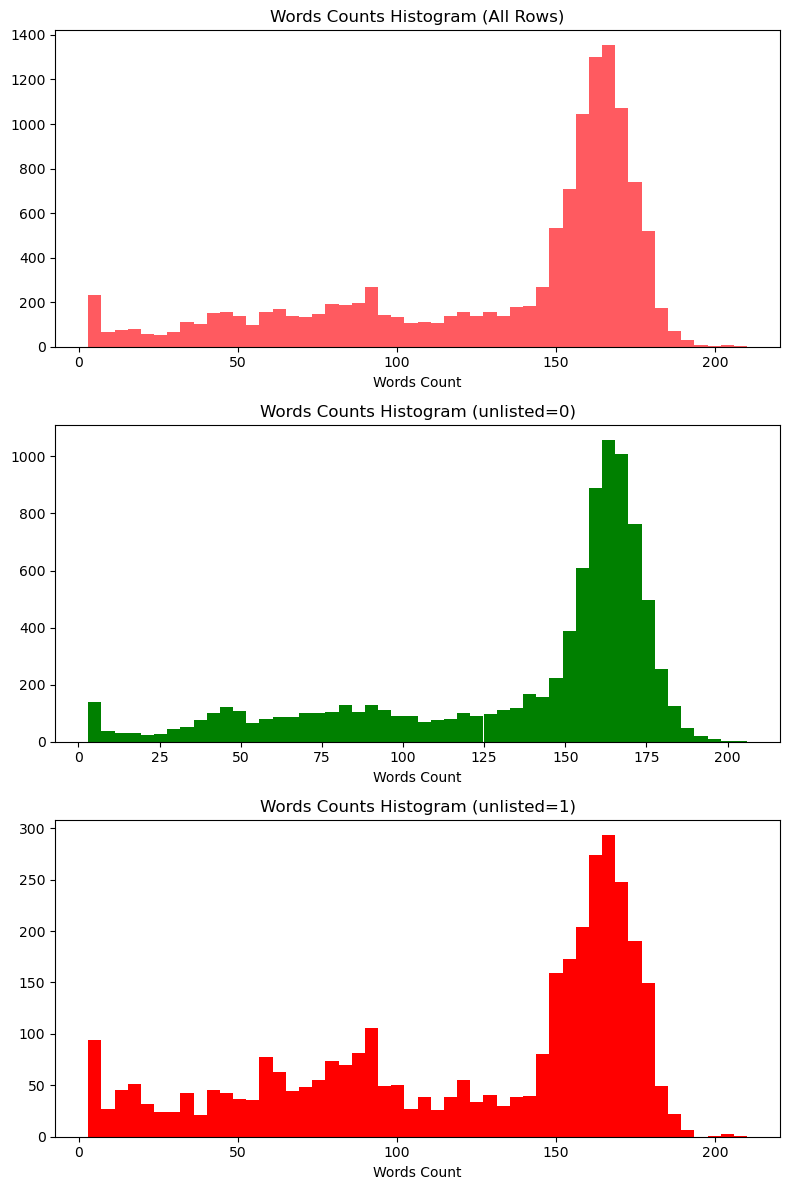

In [36]:
train['word_count_desc']  = train['description'].apply(lambda x: len(str(x).split(" ")))
plot_hist(train, 'word_count_desc', 'Words')

Although graphs have a similar shape, we can see from the range that 'unlisted = 0' has higher values in terms of counting regarding to the description variable.

### Count the words fot 'host_about' from train dataset

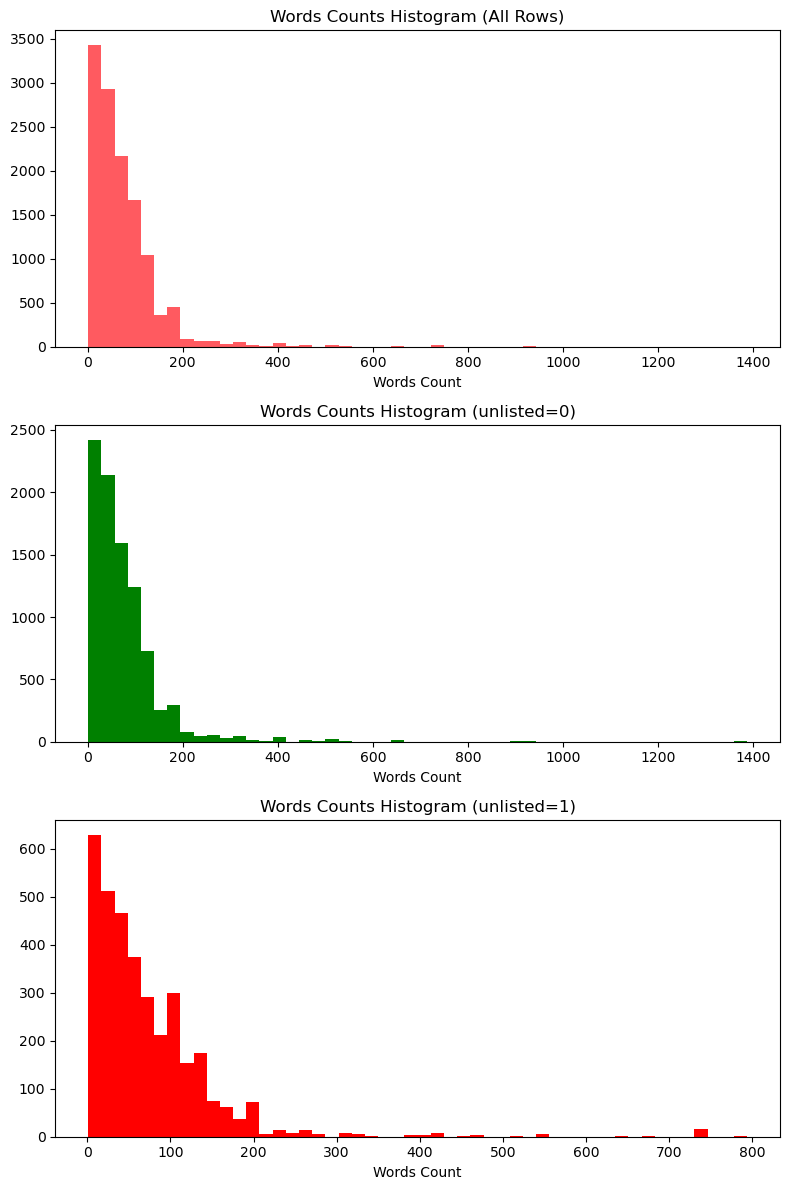

In [37]:
train['word_count_host']  = train['host_about'].apply(lambda x: len(str(x).split(" ")))
plot_hist(train, 'word_count_host', 'Words')

Can be verified the same pattern as in 'description', in 'host_about', 'unlisted = 0' has higher values in terms of counting.

### Count the words fot 'Comments' from train_reviews dataset

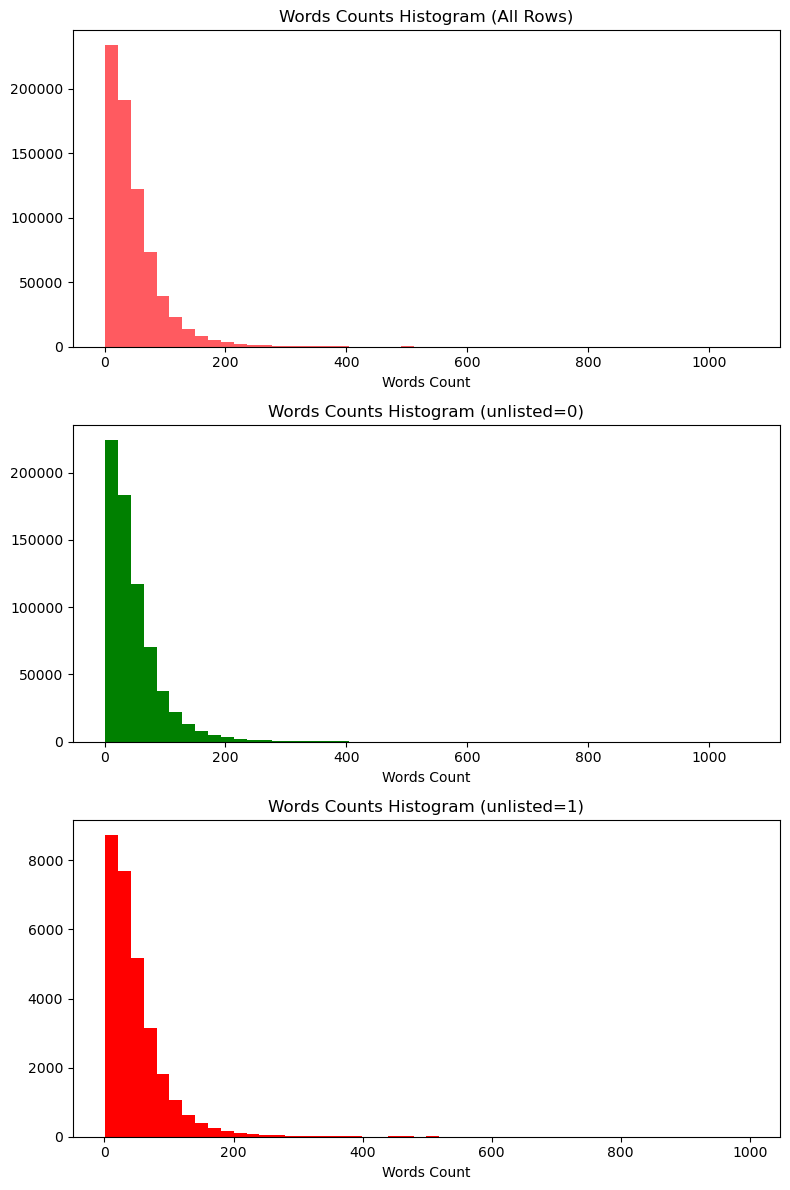

In [38]:
reviews_aux = train_reviews.merge(train[['index', 'unlisted']], left_on='index', right_on='index')
reviews_aux['word_count_rev']  = reviews_aux['comments'].apply(lambda x: len(str(x).split(" ")))
plot_hist(reviews_aux, 'word_count_rev', 'Words')

In the 'comments' variable can be verified the same  behaviour, 'unlisted = 0' has much higher values counting words compared to 'unlisted = 1'.

<h3 id="charac_counts" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.4.6 Character Counts</h3>

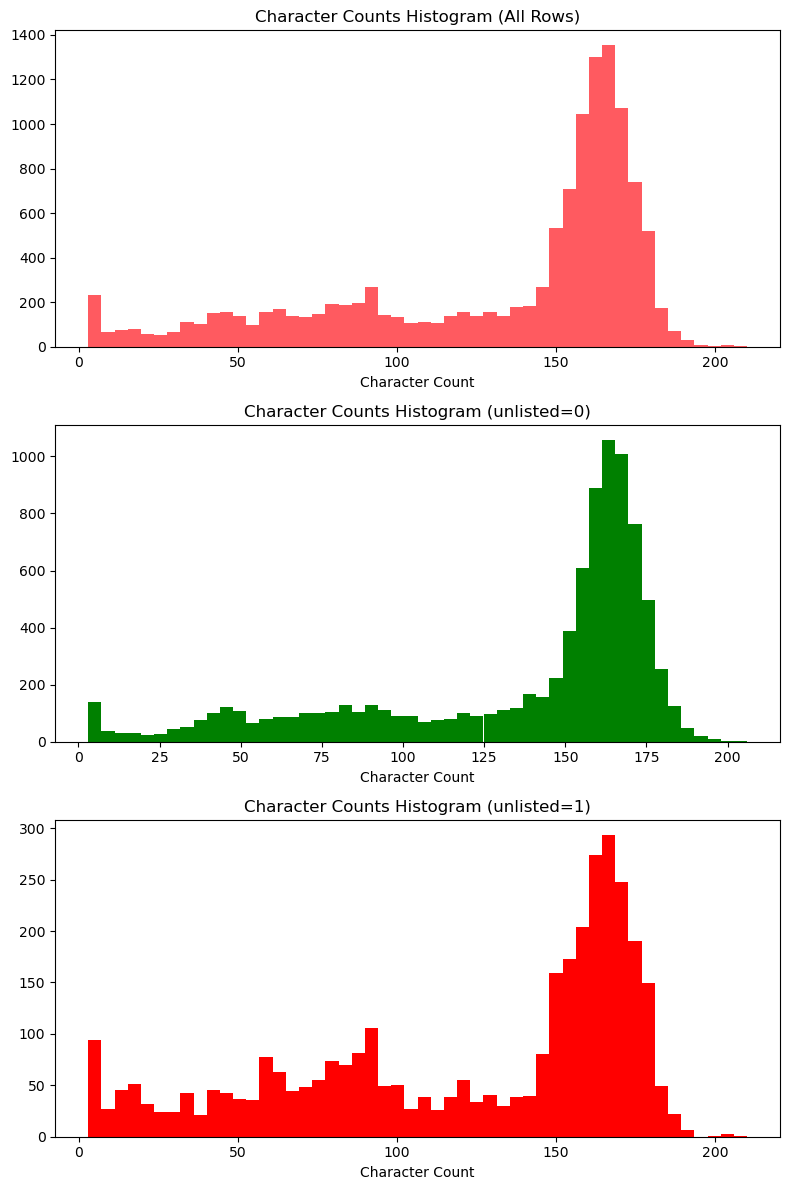

In [39]:
train['character_count_desc']  = train['description'].apply(lambda x: len(str(x).split(" ")))
plot_hist(train, 'character_count_desc', 'Character')

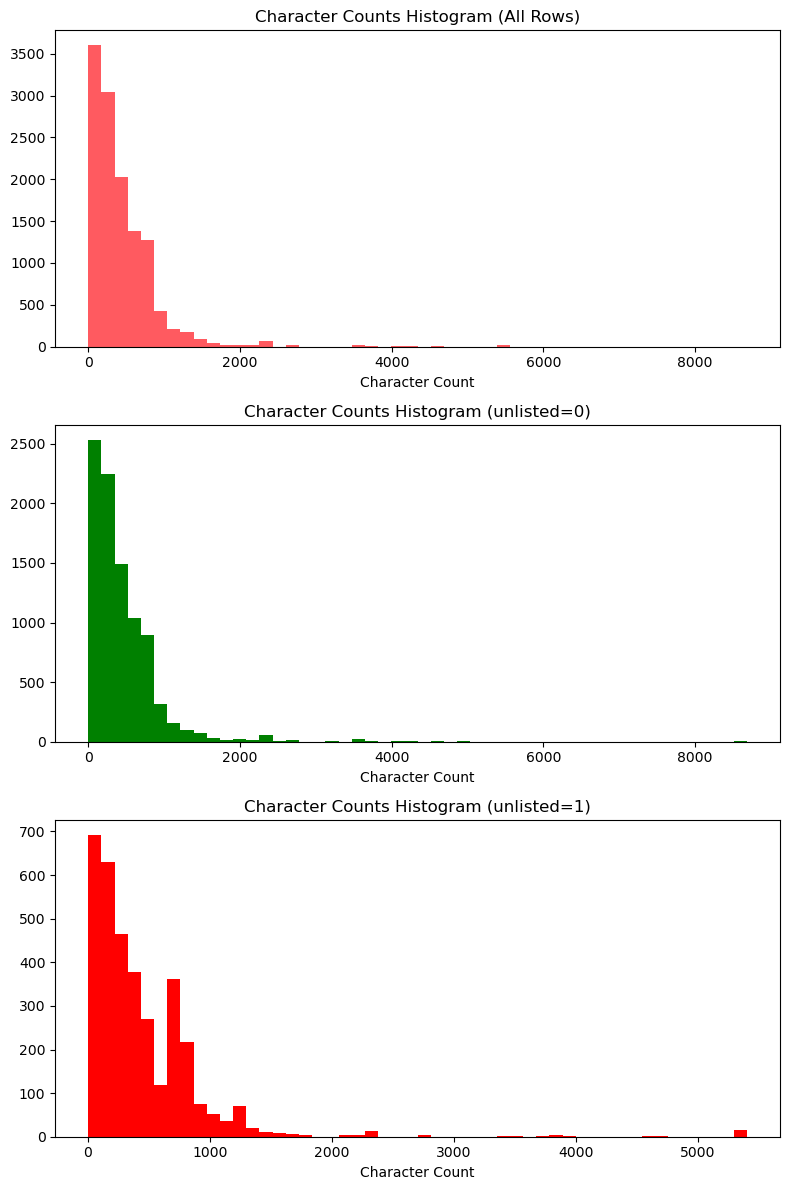

In [40]:
train['character_count_host'] = train['host_about'].apply(lambda x: len(str(x)))
plot_hist(train, 'character_count_host', 'Character')

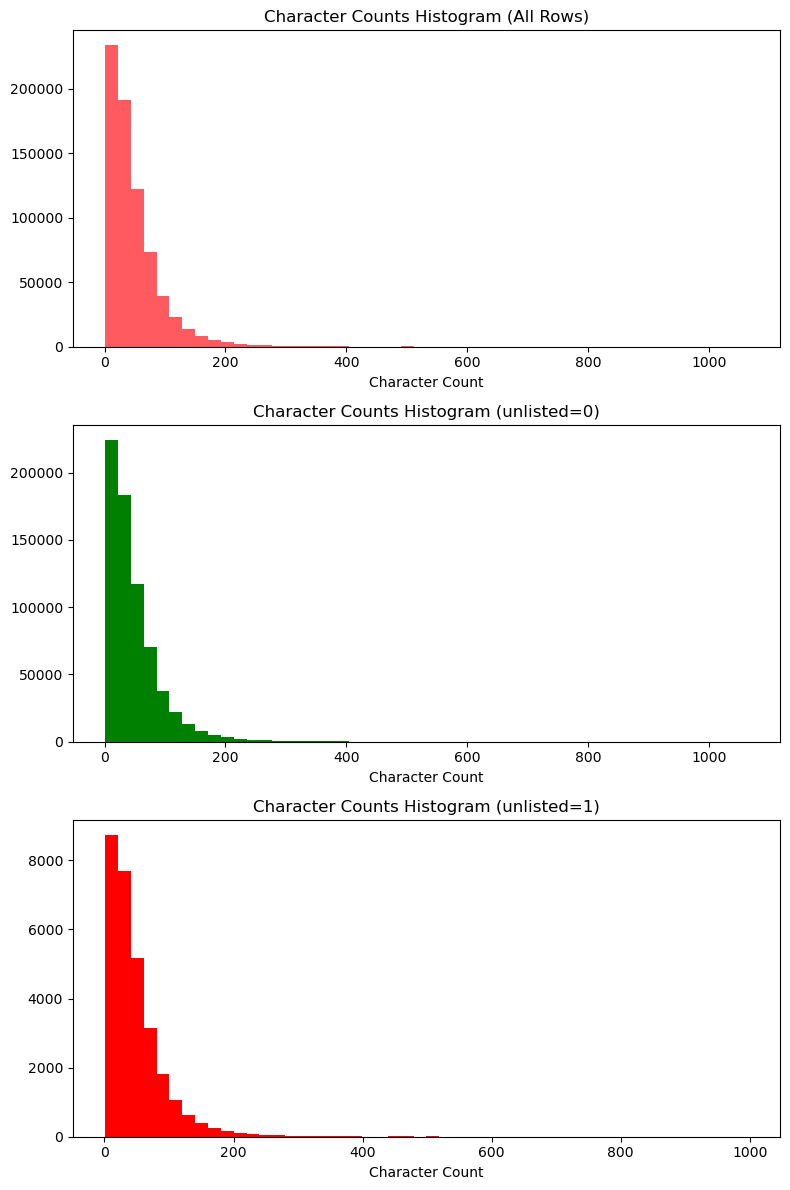

In [41]:
reviews_aux['character_count_rev']  = reviews_aux['comments'].apply(lambda x: len(str(x).split(" ")))
plot_hist(reviews_aux, 'character_count_rev', 'Character')

The pattern in terms of character is very similar to the one in terms of word counts

<h3 id="nlp" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.4.9 Natural Language Processing Analysis</h3>

In [61]:
def nlp(df, column):
    # Create a copy of the DataFrame
    df_copy = df.copy()

    # Word Count Analysis
    df_copy['word_count'] = df[column].apply(lambda x: len(str(x).split()))
    word_df=df_copy[[column, 'word_count']].describe()

    # Character Count Analysis
    df_copy['char_count'] = df[column].str.len()
    char_df = df_copy[[column, 'char_count']].describe()

    # Stopword Analysis
    stop_words = stopwords.words('english')
    df_copy['stopwords'] = df[column].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop_words]))
    stop_words_df = df_copy[[column, 'stopwords']].describe()
    
    # Punctuation Analysis
    df_copy['punctuation'] = df[column].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
    punc_df= df_copy[[column, 'punctuation']].describe()
    
    stats_df = pd.concat([word_df, char_df,stop_words_df,punc_df], axis=1)
    
    return stats_df

In [63]:
nlp(train,'description')

,word_count,char_count,stopwords,punctuation
count,12496.000000,12496.000000,12496.000000,12496.000000
mean,131.940301,814.679097,41.922375,57.484235
std,48.152818,282.124598,24.067224,24.923494
min,3.000000,12.000000,0.000000,0.000000
25%,98.000000,625.000000,20.000000,41.000000
50%,156.000000,1000.000000,47.000000,57.000000
75%,166.000000,1000.000000,62.000000,73.000000
max,200.000000,1000.000000,99.000000,315.000000


In [65]:
nlp(train,'host_about')

,word_count,char_count,stopwords,punctuation
count,12496.000000,12496.000000,12496.000000,12496.000000
mean,74.573063,439.561060,27.015685,16.514885
std,79.018605,486.271506,29.353641,34.053656
min,0.000000,0.000000,0.000000,0.000000
25%,26.000000,152.000000,4.000000,4.000000
50%,56.000000,325.000000,20.000000,10.000000
75%,104.000000,612.000000,42.000000,21.000000
max,1408.000000,8683.000000,429.000000,652.000000


In [66]:
nlp(train_reviews,'comments')

,word_count,char_count,stopwords,punctuation
count,721402.000000,721401.000000,721402.000000,721402.000000
mean,47.608486,280.584822,15.528596,9.820041
std,46.550973,267.108024,21.930120,11.904919
min,1.000000,1.000000,0.000000,0.000000
25%,17.000000,108.000000,1.000000,3.000000
50%,35.000000,211.000000,7.000000,6.000000
75%,63.000000,367.000000,22.000000,12.000000
max,1001.000000,6403.000000,503.000000,1131.000000


<h1 id="nerf" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">1.4.10 Named entity recognition and named entity frequency</h1>

This exploration analysis is going to be performed for train_reviews only, as it is considered the dataset with more insights and relevance for the purpose of the project. The same code could be applied to the other datasets, however it will turn this notebook very comprehensive.

<h1 id="ner" style="background-color: #FF5A60; color: white; font-size: 15px; padding: 10px;">1.4.10.1 Named entity recognition</h1>

Identifies and classifies named entities, such as names of people, organizations, locations, and other specified categories

In [28]:
train_reviews['comments'] = train_reviews['comments'].fillna('')
train_reviews['comments'] = train_reviews['comments'].astype(str)


In [29]:
# Load the language model
nlp = spacy.load('en_core_web_sm')

# Process each description in the Series object
entities = []
for desc in train_reviews['comments']:
    doc = nlp(desc)
    entities.append([(ent.text, ent.label_) for ent in doc.ents])

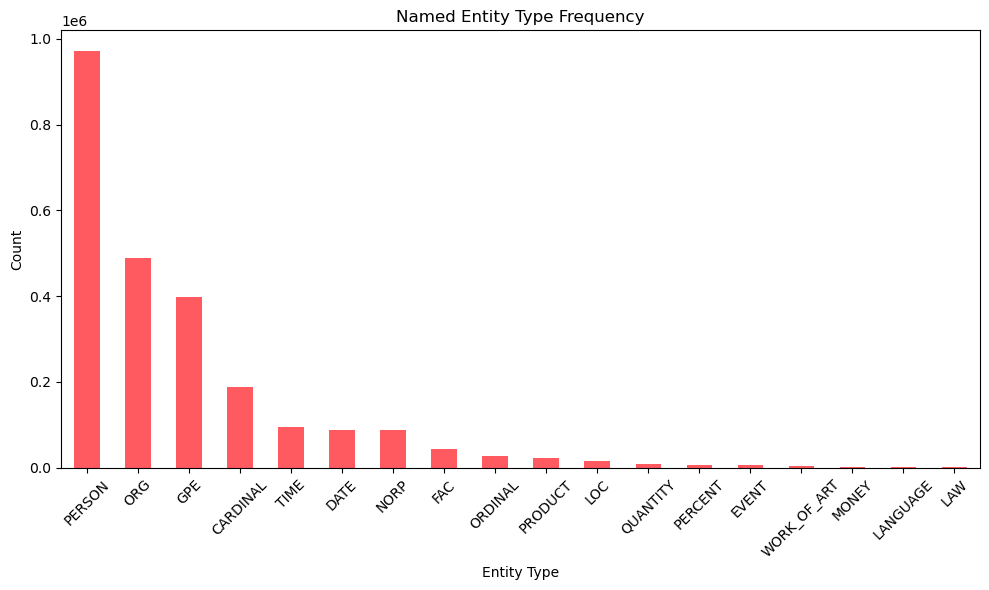

In [30]:
# Flatten the list of entity tuples
flat_entities = [entity for sublist in entities for entity in sublist]

# Create a DataFrame from the flattened entities
entities_df = pd.DataFrame(flat_entities, columns=['Entity', 'Entity Type'])

# Count the occurrences of each entity type
entity_type_counts = entities_df['Entity Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
entity_type_counts.plot(kind='bar', color='#FF5A60')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.title('Named Entity Type Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 id="nef" style="background-color: #FF5A60; color: white; font-size: 15px; padding: 10px;">1.4.10.2 Named entity frequency</h1>


In [31]:
# Flatten the list of named entities
flattened_entities = [entity for sublist in entities for entity in sublist]

# Count the frequency of each named entity
entity_freq = Counter(flattened_entities)

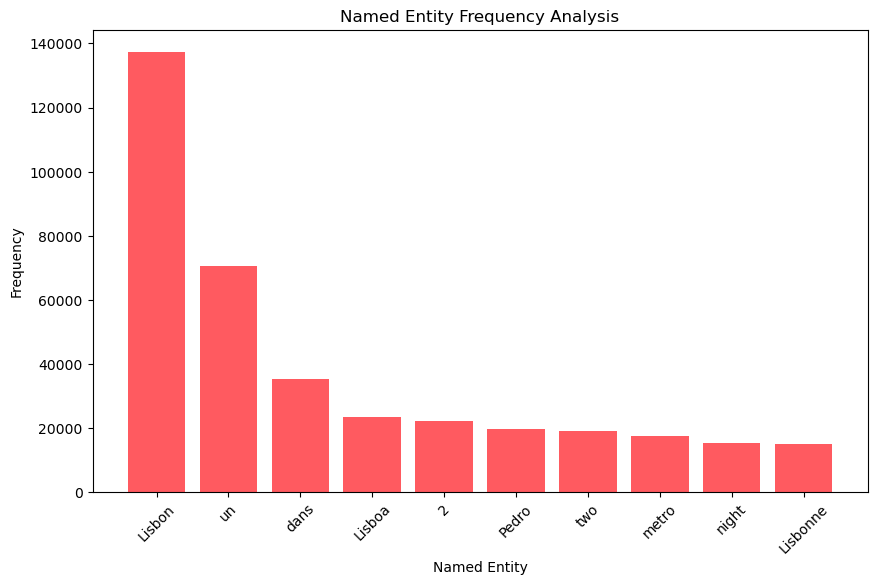

In [32]:
# Get the top N most common named entities
top_n = 10
most_common_entities = entity_freq.most_common(top_n)

# Extract the entities and their frequencies
entities = [entity[0][0] for entity in most_common_entities]
frequencies = [entity[1] for entity in most_common_entities]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(entities, frequencies, color='#FF5A60')
plt.xlabel('Named Entity')
plt.ylabel('Frequency')
plt.title('Named Entity Frequency Analysis')
plt.xticks(rotation=45)
plt.show()

<h1 id="preprocess" style="background-color: #FF5A60; color: white; font-size: 34px; font-weight: bold; padding: 10px;">2. Steps to Preprocessing</h1>

When building the models, the data will be submitted to several types of preprocessing according to the needs of each model. In this section the various types of preprocessing explored are presented but their application is only made at the time of modeling.

<h1 id="func" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">2.1. Functions for Preprocessing</h1>

<h3 id="money" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">2.1.1 Monetary Values</h3>

Function to replace all characters with monetary values or monetary symbols with #money

In [33]:
def replace_money(text):
    # regex pattern to match currency values
    pattern = r'\b\d+(\.\d{1,2})? *(\$|euros?|reais?|dollars?|pounds?|yen|rupees?)\b'
    new_text = re.sub(pattern, '#money', text, flags=re.I)
    
    return new_text

<h3 id="datetime" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">2.1.2 Datetime Values</h3>

Function to replace any daytimes and dates with #datetime

In [34]:
def replace_dates_times(text):
    # regex pattern to match date and time formats
    pattern = r'\b(\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{1,2}:\d{2}(:\d{2})?(?:\s*[ap]m)?|\d{1,2}(?:\s*[ap]m))\b'
    new_text = re.sub(pattern, '#datetime', text, flags=re.I)
    
    return new_text

<h3 id="emotions" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">2.1.3 Emojis</h3>

Function to replace emoticons for the possible sentiment:

In [35]:
def replace_emoticons(text):
    emoticon_patterns = {
        ":)": "#good",
        ":-)": "#good",
        ":]": "#good",
        ":D": "#good",
        ";)": "#good",
        ":(": "#bad",
        ":'(": "#bad",
        ":/": "#bad",
        ":\\": "#bad",
        ":|": "#bad",
        ":p": "#good",
        ":P": "#good",
        ":s": "#bad",
        ":S": "#bad",
        "xD": "#good",
        "XD": "#good",
        "<3": "#good",
        ">:(": "#bad",
        ">:(": "#bad",
        ">:[": "#bad",
        ">:/": "#bad",
        ">:\\": "#bad",
        ">:{": "#bad",
        ">:[": "#bad"}

    # Replace emojis with sentiment tags
    for emoticon, tag in emoticon_patterns.items():
        text = re.sub(re.escape(emoticon), tag, text)

    return text

Function to remove the remained emojis not treated with sentiment before:

In [36]:
#Function to remove Emjois
def remove_emojis(text):
    # Remove emojis from the text
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emojis
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

<h3 id="entity" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">2.1.4 Entity Values</h3>

Function to replace the entities by its type:

In [37]:
# Load the language model
nlp_re = spacy.load('en_core_web_sm')

def replace_entities(text):
    doc = nlp_re(text)
    new_text = ""
    for token in doc:
        if token.ent_type_ == 'CARDINAL':
            new_text += "#number "
        elif token.ent_type_ == 'GPE' or token.ent_type_ == 'LOC':
            new_text += '#place '
        else:
            new_text += token.text + " "
    return new_text.strip()

<h3 id="empties" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">2.1.5 Empty Values</h3>

This function will replace all NaN and empty cells ' ' with the code #empty, it will help in the modelling.

In [38]:
def replace_empty(text):
    # Handle NaN values and parameters with only spaces
    if text is np.nan or text.strip() == '':
        return '#empty'
    
    return text

<h1 id="finalclean" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">2.2 Final Treatment/Cleaning function</h1>


So this final function for text cleaning takes into account many aspects from exploration explained before.
- In the exploration in the most common words there's a lot of stopwords, so it makes sense to consider it.
- Can be found also a lot of strange characters such as 'br' '++', which led to the decision of deleting words with less than 3 characters
- Can be found a lot of URLs, HTML, non-alphanumeric and non-whitespace characters
- For model processing is better to have the information of being a datetime than the proper day or time
- Same for money
- Is more usefull to have the possible feeling meant by an emoji thant the proper emoji as it is hard to process, and we can see from the exploration that we have a lot of emojis

Besides the previous functions that are considered more complex and uncomon, the TextCleaning function also envolves other text cleaning more simple explained above.

<h3 id="cleanen" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">2.2.1 Complete text cleaning function - only ENGLISH</h3>

Some functions created above only work for english text, so it was decided to creat a complete text cleaning function 'TextCleaning', only for text in english.

During the model creation, the ones using this function of cleaning are going to be translate to english or using only the text originally in english

In [39]:
class TextCleaning:
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = SnowballStemmer('english')
        self.lemmatize = True
        self.stem = False

    def clean_text(self, text_list):
        cleaned_text = []
        
        for j in tqdm(text_list):
            text = j
            # Lowercase text
            text = text.lower()
            
            # Remove numerical data, punctuation and URLs
            text = re.sub(r'http\S+', '', text)  #substitute all URLs in the text with an empty string.
            text = re.sub(r'\$\S+', '', text) #substitutes all substrings starting with a dollar sign ($)
            text = "".join([char for char in text if char not in string.punctuation])
            text = re.sub(r'[^\w\s]', '', text) #substitute all non-alphanumeric and non-whitespace characters with an empty string. 
            text = re.sub(r'\d+', '', text)  #substitutes all substrings consisting of one or more digits (\d+) with an empty string.
            text= re.sub(r'\#\w+', '', text)
            text = BeautifulSoup(text, "html.parser").get_text() # Remove HTML tags
            text = " ".join([word for word in text.split() if len(word) >= 3]) #remove words with less than 3 characters

            #Replace dates and times
            text = replace_dates_times(text)

            #Replace money text
            text = replace_money(text)

            #Replace emoticons with sentiment tags
            text = replace_emoticons(text)

            #Remove the remain Emojis (as the ones not replaced with sentiments are not necessary)
            text = remove_emojis(text)

            #Apply the replace entities function created
            text = replace_entities(text)

            # Remove stopwords
            text = " ".join([word for word in text.split() if word not in self.stopwords])
            
            #Replace empty cells
            text = replace_empty(text)

            # Lemmatize text
            if self.lemmatize:
                text = " ".join(self.lemmatizer.lemmatize(word) for word in text.split())
                
            # Stem text
            if self.stem:
                text = " ".join(self.stemmer.stem(word) for word in text.split())
                
            cleaned_text.append(text)
            
        return cleaned_text

In [40]:
# create an instance of the TextCleaning class
cleaner = TextCleaning()

<h3 id="cleanbasic" style="background-color: #FF5A60; color: white; font-size: 20px; padding: 10px;">2.2.2 Basic Cleaning</h3>

As some models are robust to differente languages and to text mistakes, the function 'Basiclean_text' will help only to clean the superficial part of the dataset to make those models more efficient. Not in depth cleaning, and can be used for all the languages.

In [41]:
def Basiclean_text(text):
    # to lower case
    text = text.lower()
    # remove links
    text = re.sub('https:\/\/\S+', '', text) 
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    # remove next line     
    text = re.sub(r'[^ \w\.]', '', text) 
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    
    return text

<>:5: DeprecationWarning:

invalid escape sequence '\/'

<>:11: DeprecationWarning:

invalid escape sequence '\w'

<>:5: DeprecationWarning:

invalid escape sequence '\/'

<>:11: DeprecationWarning:

invalid escape sequence '\w'

/var/folders/3p/rjdxwt317bq2gmzrldx7pptc0000gn/T/ipykernel_72656/1355461861.py:5: DeprecationWarning:

invalid escape sequence '\/'

/var/folders/3p/rjdxwt317bq2gmzrldx7pptc0000gn/T/ipykernel_72656/1355461861.py:11: DeprecationWarning:

invalid escape sequence '\w'



<h1 id="datacleanc" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">2.3 Cleaning the dataset</h1>

In [43]:
# Create a copy of train_enpt and train_reviews_enpt
train_en_clean = train[(train['description_lang'] == 'English') & (train['host_about_lang'] == 'English')].copy()
train_reviews_en_clean = train_reviews[train_reviews['comments_lang'] == 'English'].copy()

# Clean the 'description' column
train_en_clean['description'] = cleaner.clean_text(train_en_clean['description'])

# Clean the 'host_about' column
train_en_clean['host_about'] = cleaner.clean_text(train_en_clean['host_about'])

# Clean the 'comments' column
train_reviews_en_clean['comments'] = cleaner.clean_text(train_reviews_en_clean['comments'])

100%|██████████| 461757/461757 [1:50:56<00:00, 69.37it/s]  


In [44]:
# Specify the file path and name
file_path1 = '/Users/LuisFernandes/Desktop/TM Project/TM_03_06/EN_Clean/train_reviews_en_clean.csv'
file_path2 = '/Users/LuisFernandes/Desktop/TM Project/TM_03_06/EN_Clean/train_en_clean.csv'
# Convert DataFrame to CSV and save it
train_reviews_en_clean.to_csv(file_path1, index=False)
train_en_clean.to_csv(file_path2, index=False)

<h1 id="explore2" style="background-color: #FF5A60; color: white; font-size: 34px; font-weight: bold; padding: 10px;">3. Exploration After Cleaning</h1>

Some aspects are gonna be explored after the cleaning for a better understanding of the cleaning made and functions applied.

For exploration purposes is important to have the unlisted collumn in the train_reviews as well:

In [45]:
# Merge train_reviews_en_clean and train_en_clean on the index
reviews_aux = pd.merge(train_reviews_en_clean, train_en_clean[['unlisted']], left_index=True, right_index=True)


<h1 id="examples_clean" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">3.1 Dataset after cleaning</h1>

In [46]:
train_reviews_en_clean.head()

,index,comments,comments_lang
0,1,cozy comfortable house stay innever worry safe...,English
2,1,first hostel experience say pretty hard beat p...,English
4,1,fine dorm think people staying far le bathroom...,English
5,1,stay lisbon tip hostel good mixed room well cl...,English
6,1,close shop town comfortable place stay,English


In [47]:
train_en_clean.head()

,index,description,description_lang,host_about,host_about_lang,unlisted
2,3,trafarias house cozy familiar villa facility n...,English,social person liking communicate reading trave...,English,1
5,6,important response covid property extended cle...,English,homing company develops activity tourism provi...,English,0
6,7,home rent traveling perfect vacation without c...,English,globe trotter portuguese nationality german fa...,English,1
7,8,find tranquility meticulously curated lifestyl...,English,travel lot love originally #place currently sp...,English,0
8,9,charming apartment #number bedroom double bed ...,English,isabel helder portuguese parent #number wonder...,English,0


<h1 id="common_clean" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">3.2 Most Common Words</h1>

In [48]:
def plot_most_common_words(df, column, num_words=10):
    # Create a Counter object to count word frequencies
    word_counter_all = Counter()
    word_counter_0 = Counter()
    word_counter_1 = Counter()

    # Split the text into words and update the counters for each subset
    df[column].astype(str).str.lower().str.split().apply(word_counter_all.update)
    df[df['unlisted'] == 0][column].astype(str).str.lower().str.split().apply(word_counter_0.update)
    df[df['unlisted'] == 1][column].astype(str).str.lower().str.split().apply(word_counter_1.update)

    # Get the most common words and their frequencies for each subset
    common_words_all = word_counter_all.most_common(num_words)
    common_words_0 = word_counter_0.most_common(num_words)
    common_words_1 = word_counter_1.most_common(num_words)

    # Extract words and frequencies for each subset
    words_all = [word for word, _ in common_words_all]
    frequencies_all = [freq for _, freq in common_words_all]
    
    words_0 = [word for word, _ in common_words_0]
    frequencies_0 = [freq for _, freq in common_words_0]
    
    words_1 = [word for word, _ in common_words_1]
    frequencies_1 = [freq for _, freq in common_words_1]

    # Create the plot
    fig, axs = plt.subplots(3, 1, figsize=(8, 18))

    axs[0].bar(words_all, frequencies_all, color='#FF5A60')
    axs[0].set_xlabel('Words')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Most Common Words (All Rows)')

    axs[1].bar(words_0, frequencies_0, color='green')
    axs[1].set_xlabel('Words')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Most Common Words (unlisted=0)')

    axs[2].bar(words_1, frequencies_1, color='red')
    axs[2].set_xlabel('Words')
    axs[2].set_ylabel('Frequency')
    axs[2].set_title('Most Common Words (unlisted=1)')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [49]:
def plot_most_common_words(df, column, num_words=10):
    # Create a Counter object to count word frequencies
    word_counter_all = Counter()
    word_counter_0 = Counter()
    word_counter_1 = Counter()

    # Split the text into words and update the counters for each subset
    df[column].astype(str).str.lower().str.split().apply(word_counter_all.update)
    
    if 'unlisted' in df.columns:
        df[df['unlisted'] == 0][column].astype(str).str.lower().str.split().apply(word_counter_0.update)
        df[df['unlisted'] == 1][column].astype(str).str.lower().str.split().apply(word_counter_1.update)

    # Get the most common words and their frequencies for each subset
    common_words_all = word_counter_all.most_common(num_words)
    common_words_0 = word_counter_0.most_common(num_words) if 'unlisted' in df.columns else []
    common_words_1 = word_counter_1.most_common(num_words) if 'unlisted' in df.columns else []

    # Extract words and frequencies for each subset
    words_all = [word for word, _ in common_words_all]
    frequencies_all = [freq for _, freq in common_words_all]
    
    words_0 = [word for word, _ in common_words_0]
    frequencies_0 = [freq for _, freq in common_words_0]
    
    words_1 = [word for word, _ in common_words_1]
    frequencies_1 = [freq for _, freq in common_words_1]

    # Create the plot
    fig, axs = plt.subplots(3, 1, figsize=(8, 18))

    axs[0].bar(words_all, frequencies_all, color='#FF5A60')
    axs[0].set_xlabel('Words')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Most Common Words (All Rows)')

    if 'unlisted' in df.columns:
        axs[1].bar(words_0, frequencies_0, color='green')
        axs[1].set_xlabel('Words')
        axs[1].set_ylabel('Frequency')
        axs[1].set_title('Most Common Words (unlisted=0)')

        axs[2].bar(words_1, frequencies_1, color='red')
        axs[2].set_xlabel('Words')
        axs[2].set_ylabel('Frequency')
        axs[2].set_title('Most Common Words (unlisted=1)')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Plotting the most common words after cleaning.

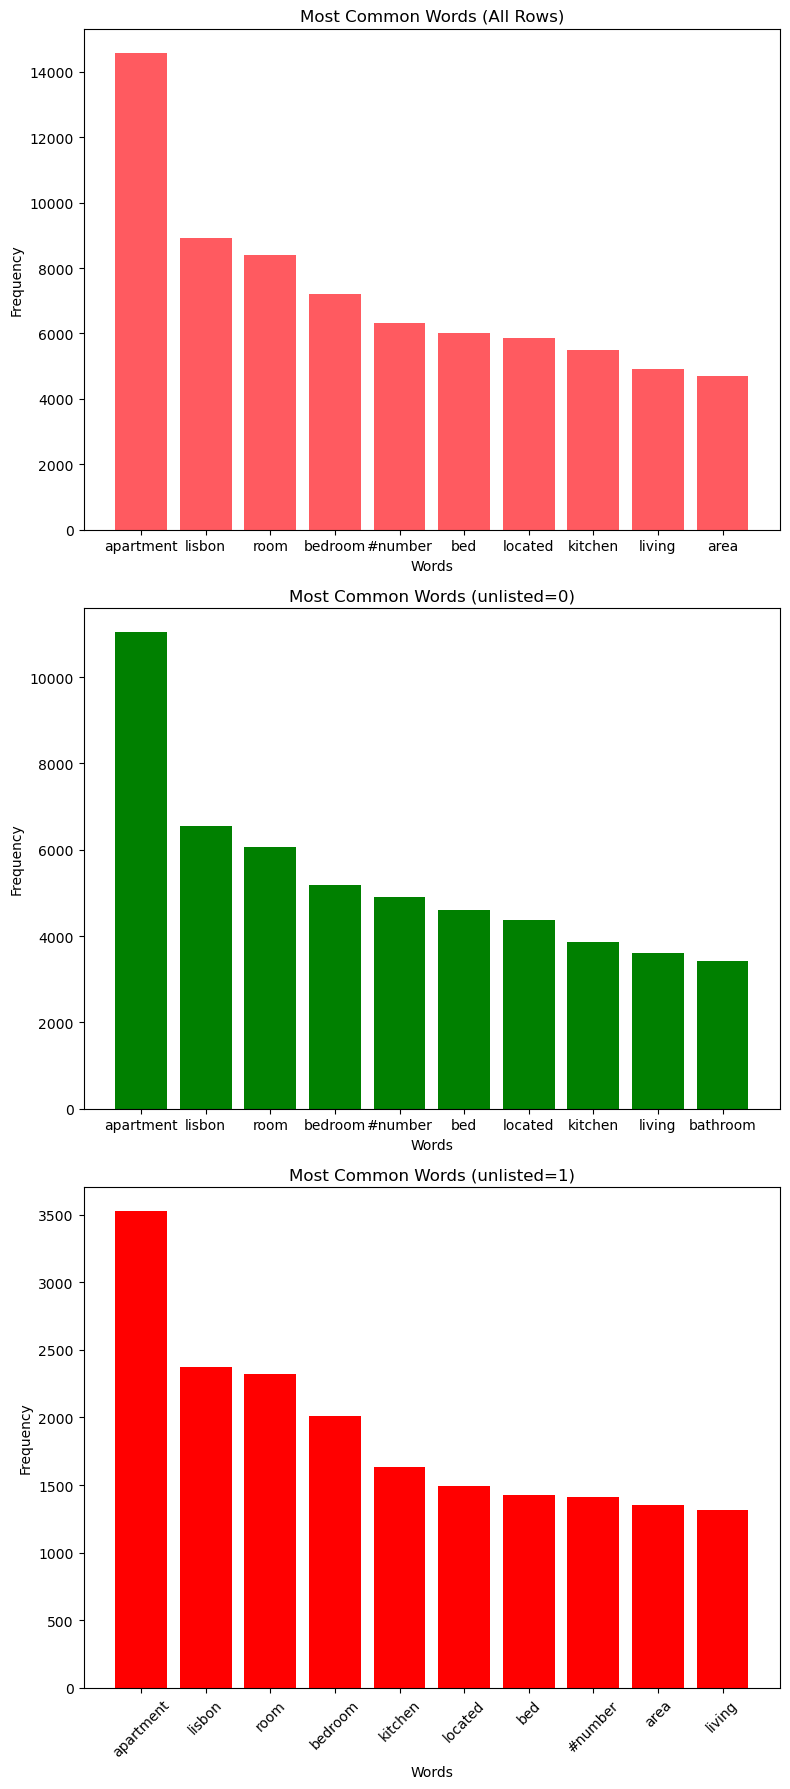

In [50]:
plot_most_common_words(train_en_clean, 'description', num_words=10)

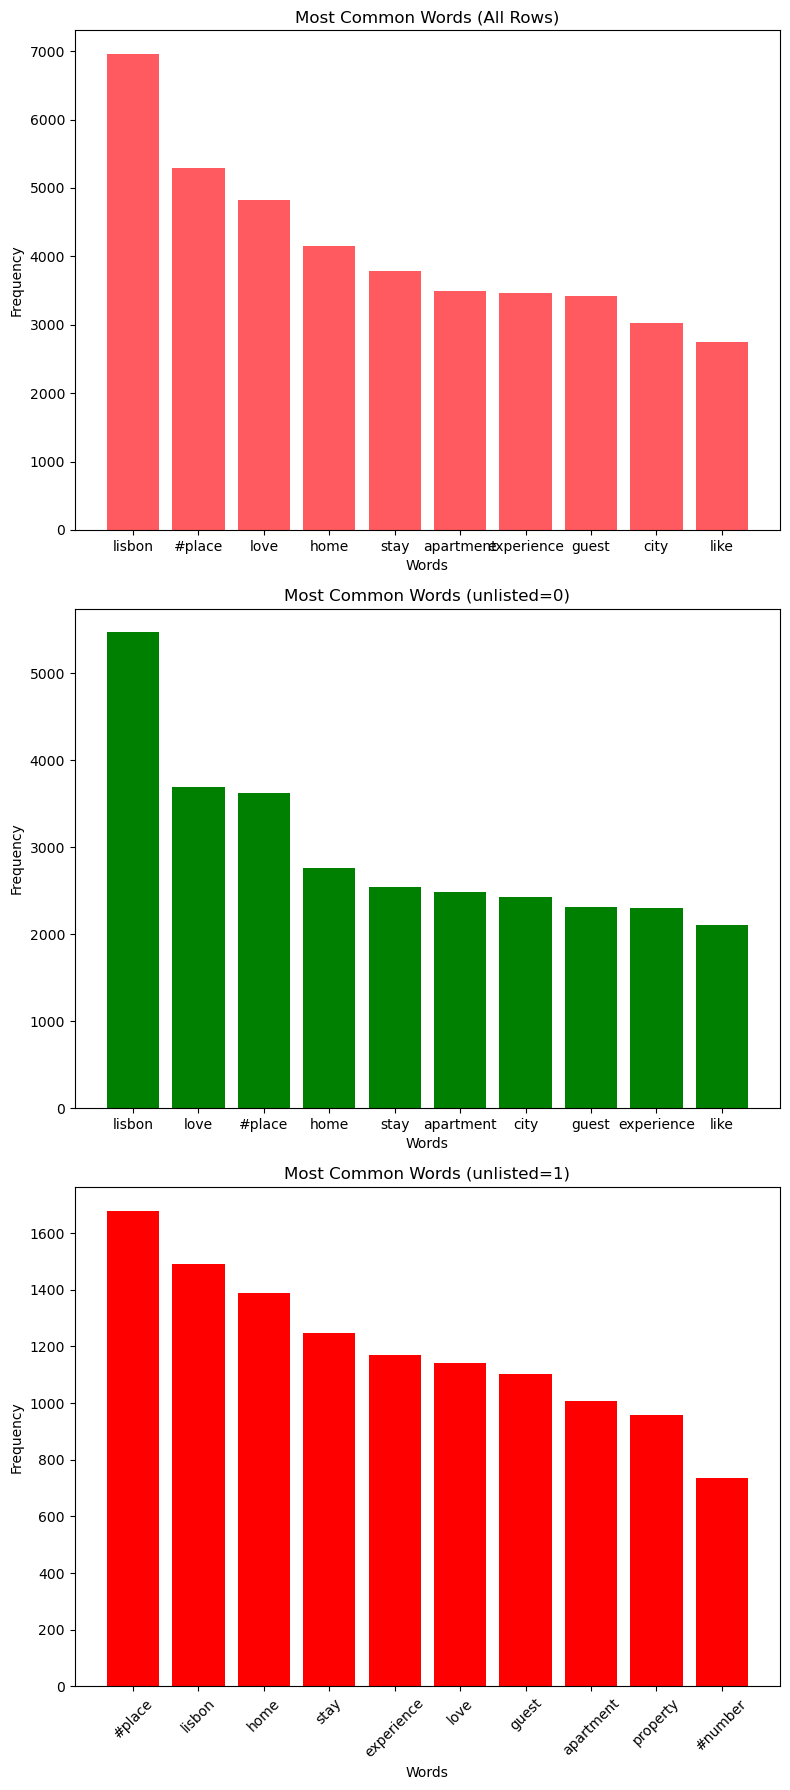

In [51]:
plot_most_common_words(train_en_clean, 'host_about', num_words=10)

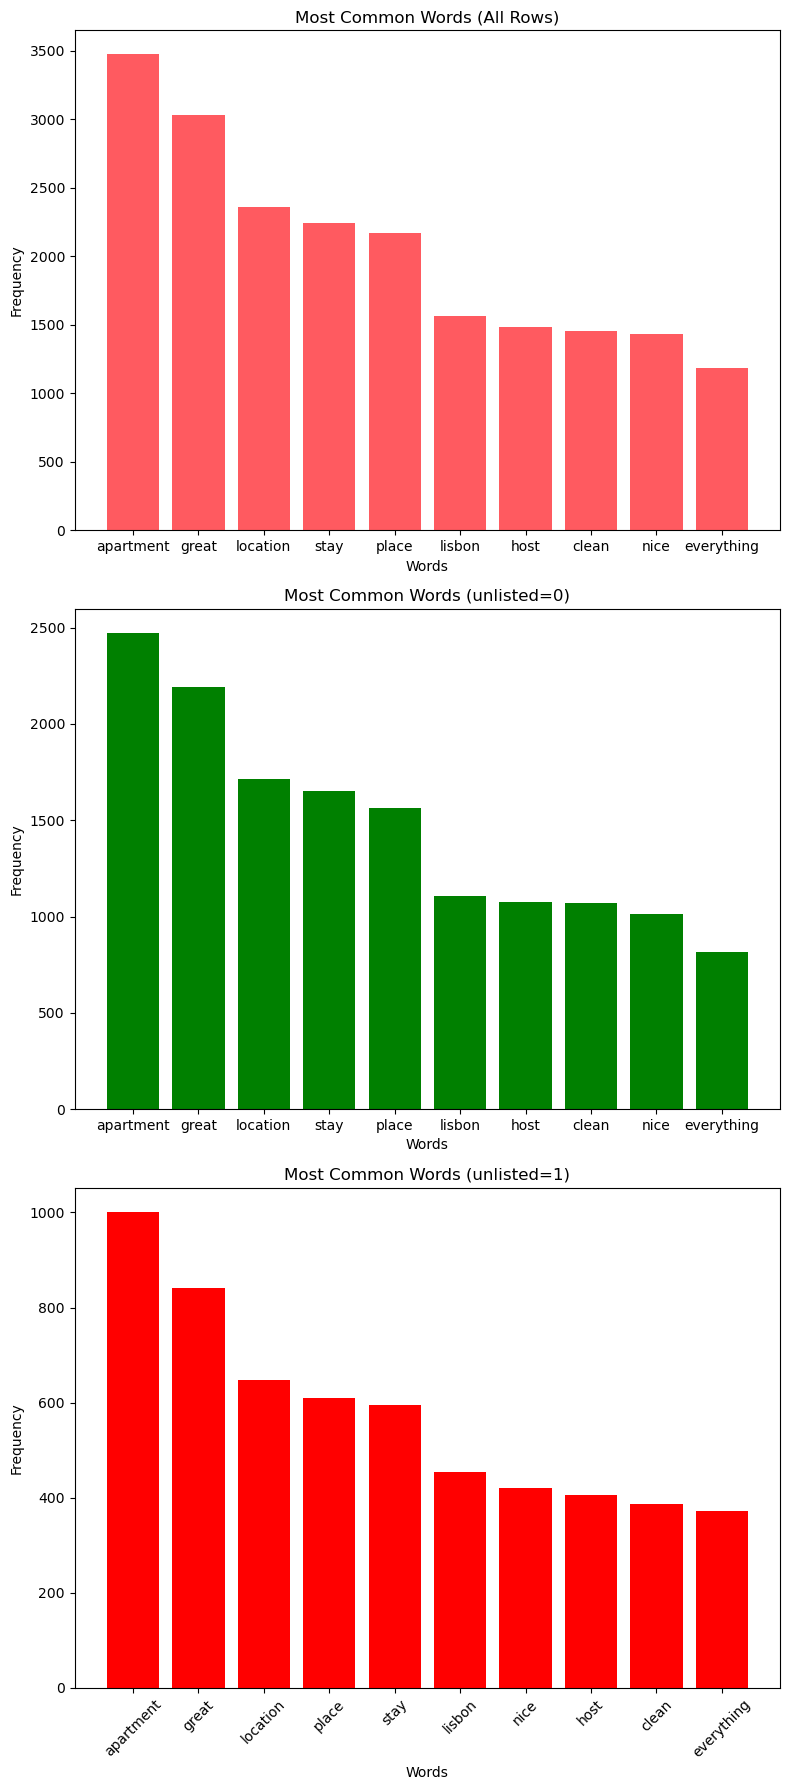

In [52]:
plot_most_common_words(reviews_aux, 'comments', num_words=10)

<h1 id="ngram_clean" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">3.3 N-Grams </h1>

Plotting the most common bi-grams after cleaning.

In [53]:
def plot_most_common_ngrams(df, column, ngram_range=(2, 2), num_ngrams=10):
    # Create a CountVectorizer object to extract n-grams
    vectorizer_all = CountVectorizer(ngram_range=ngram_range)
    vectorizer_0 = CountVectorizer(ngram_range=ngram_range)
    vectorizer_1 = CountVectorizer(ngram_range=ngram_range)

    # Fill NaN values with empty strings
    df[column].fillna('', inplace=True)

    # Convert column values to string type
    df[column] = df[column].astype(str)

    # Fit and transform the text column for each subset
    ngrams_all = vectorizer_all.fit_transform(df[column])
    ngrams_0 = vectorizer_0.fit_transform(df[df['unlisted'] == 0][column])
    ngrams_1 = vectorizer_1.fit_transform(df[df['unlisted'] == 1][column])

    # Get the n-grams and their frequencies for each subset
    ngrams_list_all = vectorizer_all.get_feature_names()
    frequencies_all = ngrams_all.sum(axis=0).tolist()[0]
    
    ngrams_list_0 = vectorizer_0.get_feature_names()
    frequencies_0 = ngrams_0.sum(axis=0).tolist()[0]
    
    ngrams_list_1 = vectorizer_1.get_feature_names()
    frequencies_1 = ngrams_1.sum(axis=0).tolist()[0]

    # Sort the n-grams by frequency
    sorted_indices_all = sorted(range(len(frequencies_all)), key=lambda i: frequencies_all[i], reverse=True)
    sorted_indices_0 = sorted(range(len(frequencies_0)), key=lambda i: frequencies_0[i], reverse=True)
    sorted_indices_1 = sorted(range(len(frequencies_1)), key=lambda i: frequencies_1[i], reverse=True)

    sorted_ngrams_all = [ngrams_list_all[i] for i in sorted_indices_all[:num_ngrams]]
    sorted_frequencies_all = [frequencies_all[i] for i in sorted_indices_all[:num_ngrams]]
    
    sorted_ngrams_0 = [ngrams_list_0[i] for i in sorted_indices_0[:num_ngrams]]
    sorted_frequencies_0 = [frequencies_0[i] for i in sorted_indices_0[:num_ngrams]]
    
    sorted_ngrams_1 = [ngrams_list_1[i] for i in sorted_indices_1[:num_ngrams]]
    sorted_frequencies_1 = [frequencies_1[i] for i in sorted_indices_1[:num_ngrams]]

    # Create the plot
    fig, axs = plt.subplots(3, 1, figsize=(8, 18))

    axs[0].bar(sorted_ngrams_all, sorted_frequencies_all, color='#FF5A60')
    axs[0].set_xlabel('N-grams')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Most Common N-grams (All Rows)')
    axs[0].tick_params(axis='x', rotation=45)

    axs[1].bar(sorted_ngrams_0, sorted_frequencies_0, color='green')
    axs[1].set_xlabel('N-grams')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Most Common N-grams (unlisted=0)')
    axs[1].tick_params(axis='x', rotation=45)

    axs[2].bar(sorted_ngrams_1, sorted_frequencies_1, color='red')
    axs[2].set_xlabel('N-grams')
    axs[2].set_ylabel('Frequency')
    axs[2].set_title('Most Common N-grams (unlisted=1)')
    axs[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

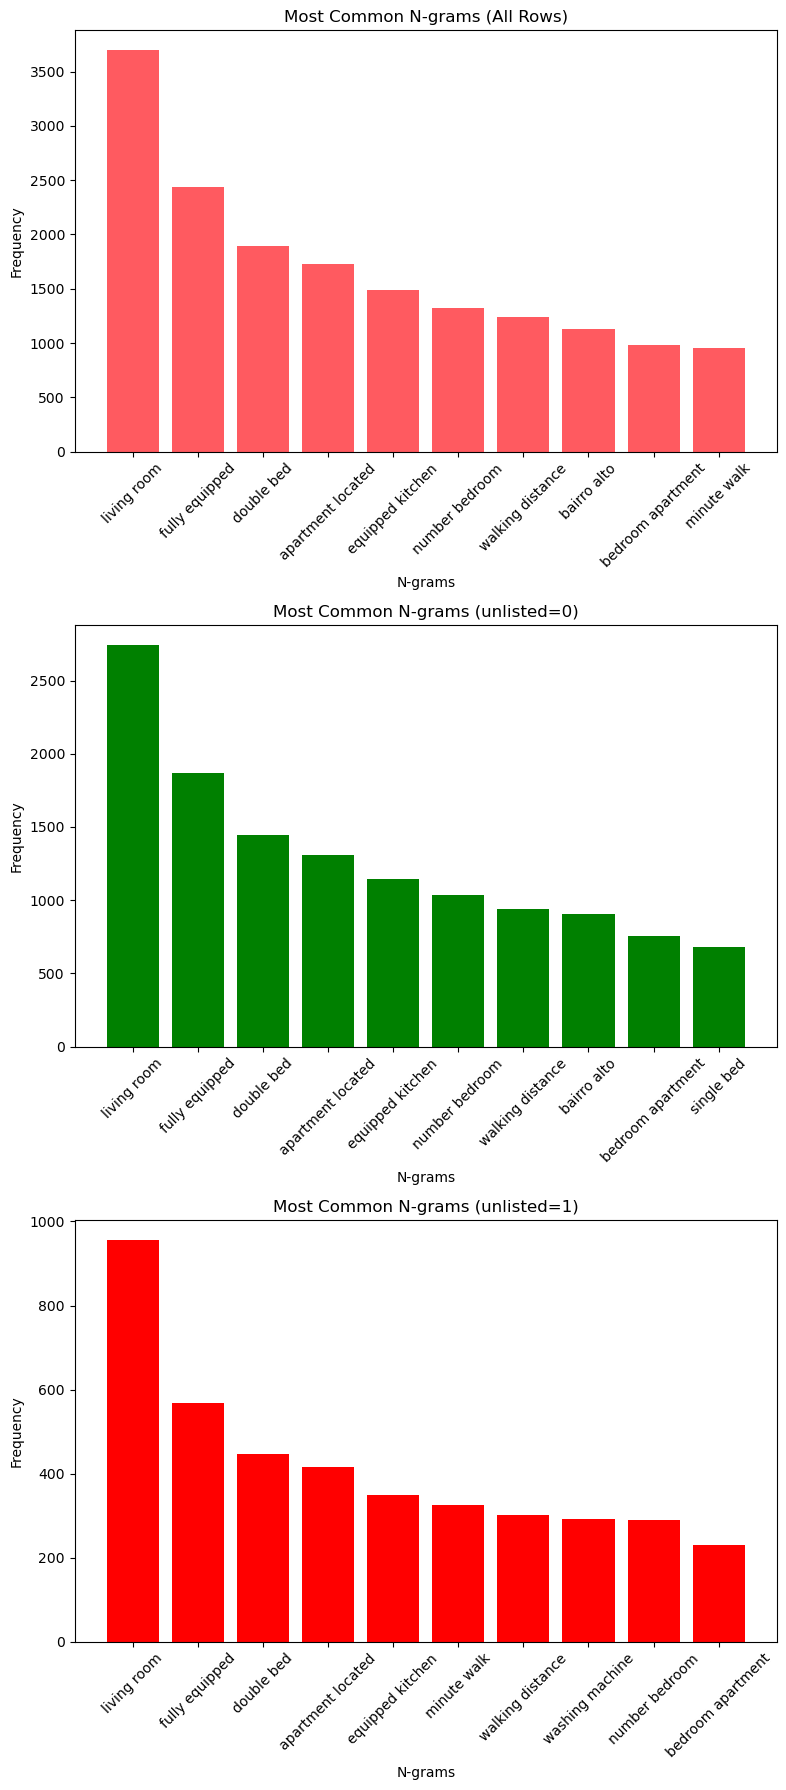

In [54]:
plot_most_common_ngrams(train_en_clean, 'description', ngram_range=(2, 2), num_ngrams=10)

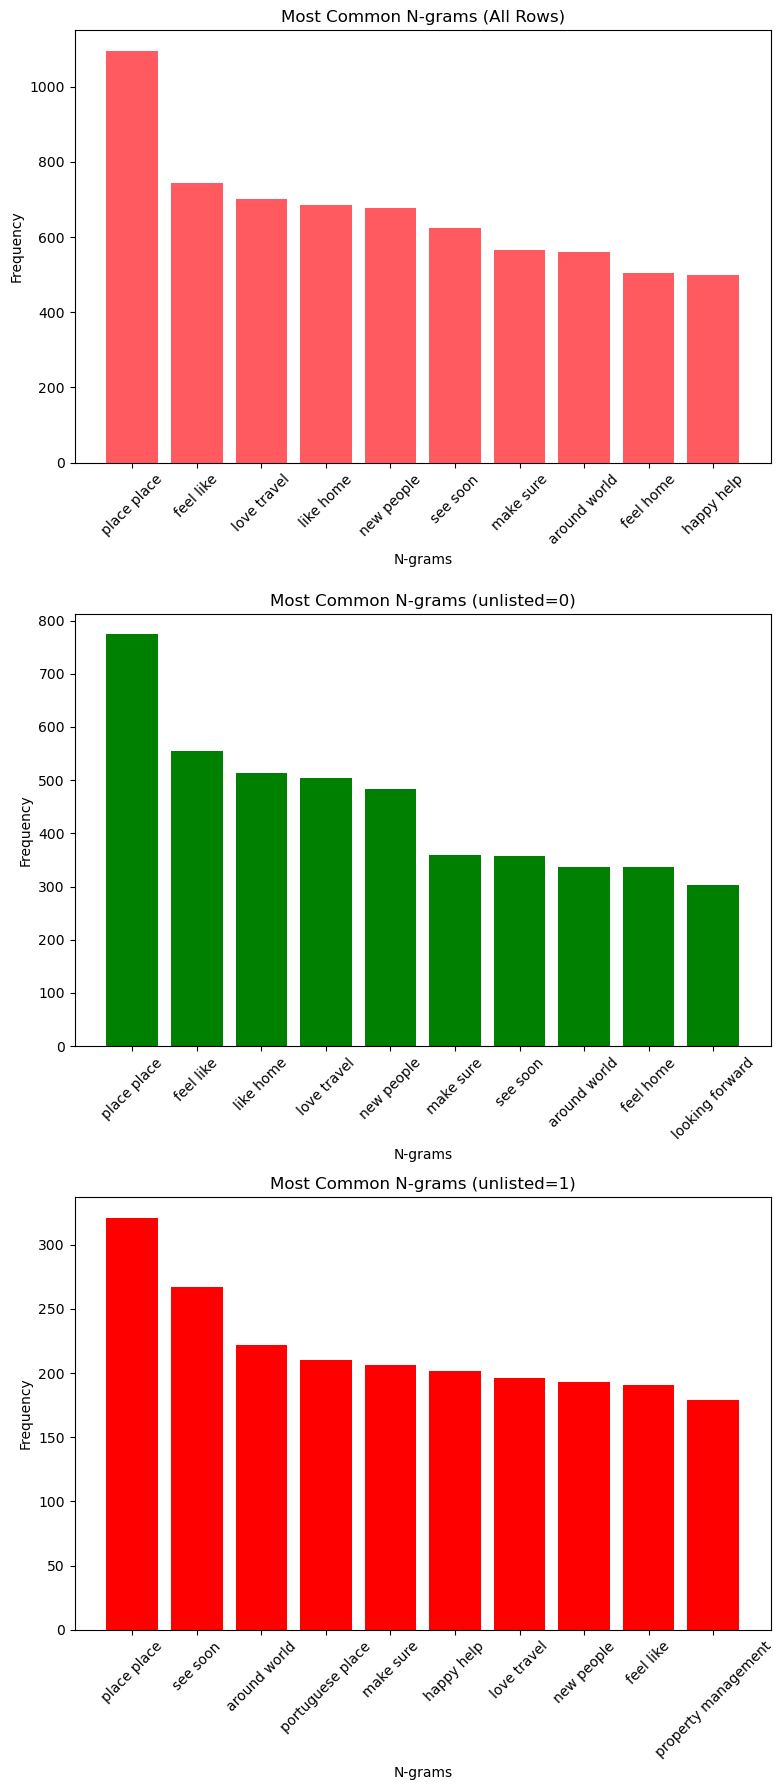

In [55]:
plot_most_common_ngrams(train_en_clean, 'host_about', ngram_range=(2, 2), num_ngrams=10)

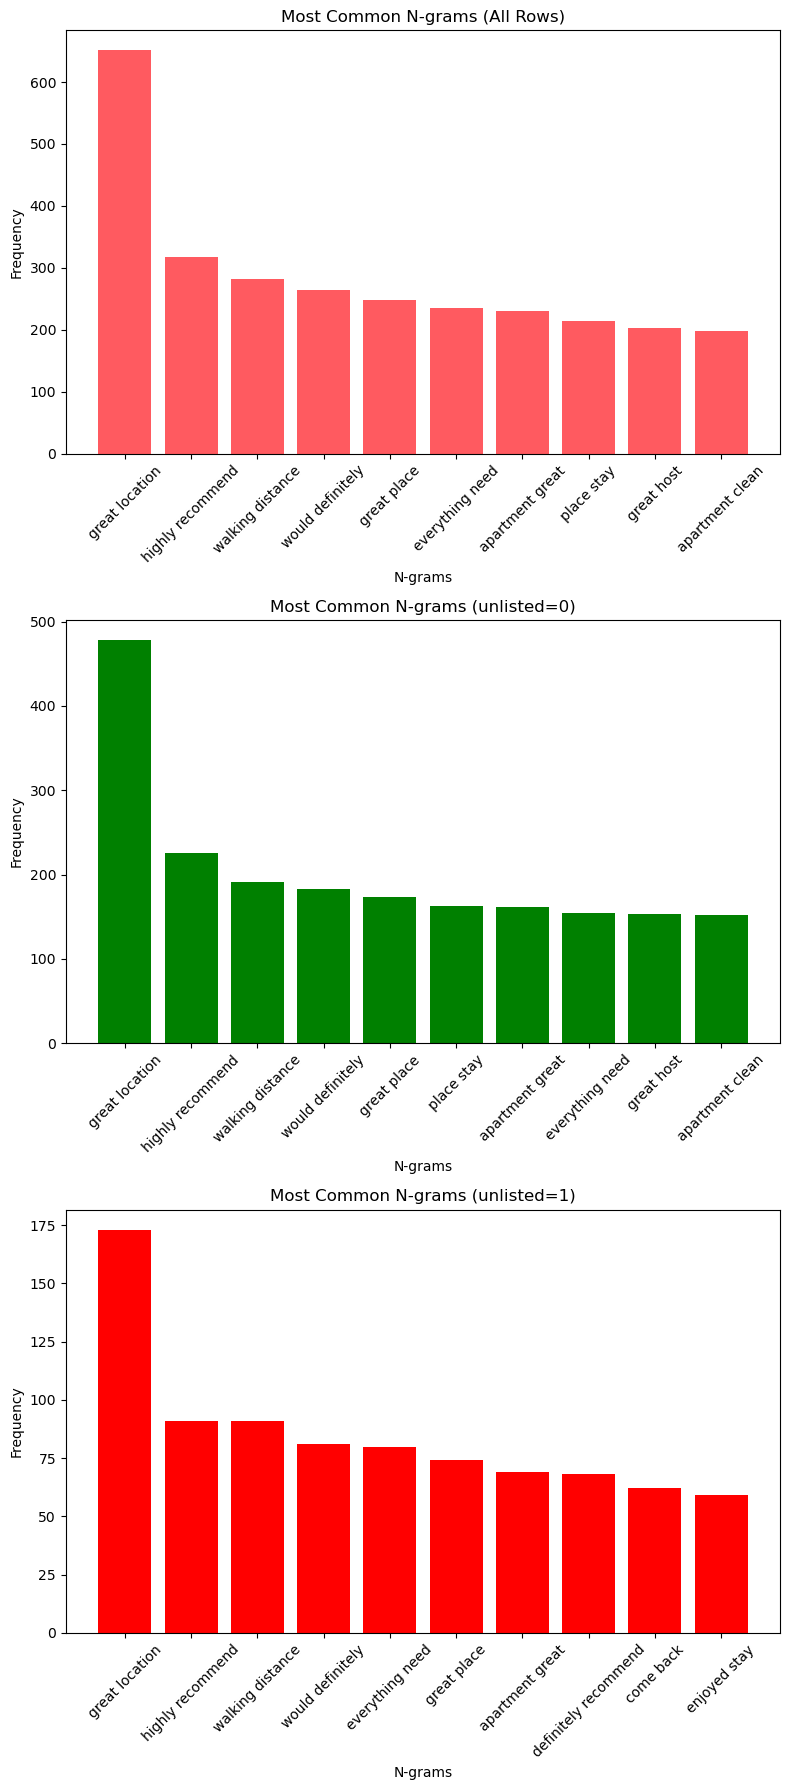

In [56]:
plot_most_common_ngrams(reviews_aux, 'comments', ngram_range=(2, 2), num_ngrams=10)

<h1 id="lda" style="background-color: #FF5A60; color: white; font-size: 25px; padding: 10px;">3.4 LDA - Topic Modeling</h1>

Topic modeling is a technique for identifying topics or themes that run through a collection of documents. One popular algorithm for topic modeling is Latent Dirichlet Allocation (LDA), which is available in the gensim library.

LDA assumes that each document is a mixture of a small number of topics, and each topic is a mixture of a set of words. The model uses statistical inference to estimate the probability distribution of words in each topic and the probability distribution of topics in each document.

Only English reviews may be used.

This analysis is gonna be performed in the dataset train_reviews, as it can bring good insights regarding the main issues and topics used in this section and as it has higher importance for future modeling purposes. the same analysis can be done for train, in 'description' and 'host_about' section, however in order to not have a very comprehensive notebook its not gonna be performed.

In [57]:
# Tokenize the text in english_description
tokenized_description = [word_tokenize(doc) for doc in train_reviews_en_clean['comments']]

# create a dictionary of all the words in the corpus
dictionary = Dictionary(tokenized_description)

# create a bag of words representation for each document in the corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_description]

# train the LDA model
lda_model = LdaModel(
    corpus=bow_corpus,
    id2word=dictionary,
    num_topics=10, # set the number of topics
    passes=10, # set the number of passes through the corpus
    random_state=42)

In [58]:
# create an interactive visualization of the LDA model
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis)

/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/LuisFernandes/opt/anaconda3/envs/machine/lib/python3.10/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/LuisFernandes/opt/anaconda3/envs/machine/